### Mercedes Benz Greener Manufacturing 

In [1]:
from IPython import display

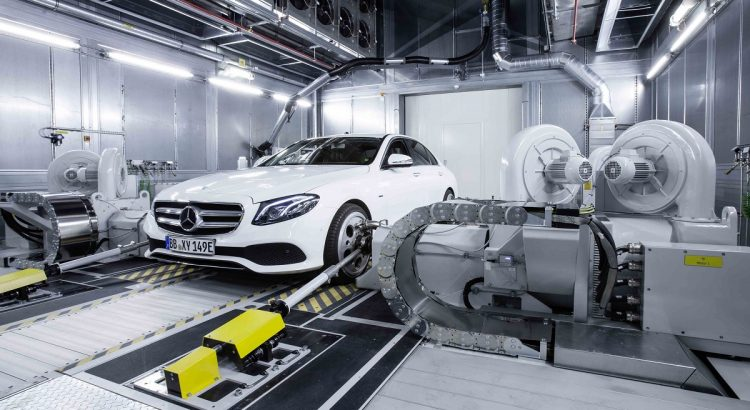

In [2]:
display.Image(".\daimler-mercedes_image_2.jpg")

image source : https://www.rad-ab.com/2016/12/23/mercedes-benz-auf-dem-pruefstand/ (glimpse of Benz testing rooms)

<u><b>Abstract</b></u>

Mercedes Benz is Manufacturer of premium cars. Daimler’s Mercedes-Benz is the
European leader among the premium car makers. This has been possible with quality
Research, Engineering , Manufacturing and Testing. They also provide a variety of
features for customers to customize their Mercedes-Benz. Now all these cars have to
be tested for functionality of equipment within the car. They also have to meet quality
standards and safety to achieve best performance when they hit the road. This requires
the testing line within the factory to be versatile to handle every unique car. To tackle
testing of a variety of cars, Company Engineers have built a robust testing system which
can handle every unique configuration of the car. Testing line has to function efficiently
as more the time the car spends on the testing, the more it contributes towards carbon
emissions. Optimizing speed of testing keeps the production line eco-friendly. It is quite
a challenge for company to optimize the speed of its testing system for so many
possible feature combinations. It is complex and time-consuming without a smart
numerical method. Being world’s biggest manufacturers of cars, it is crucial to have a
production line which is efficient and has control over their greenhouse gas emissions.

<u><b>Business problem</b></u>

Company need to keep their production time in check as it reduces their carbon
emissions. Car testing time is of prime interest as it has an impact on company's carbon
footprint. Thus controlling it makes way for greener manufacturing. To help improve the
testing system speed, it is important to understand how the car configuration affects the
process time and to what extent.

Here we need to understand there are a lot of car configurations possible and they might be unique depending on customer choices. It is not economical to have testing system for every possible configurations. So there has to be fewer or if possible one testing system capable to handle testing of all the car configurations.  

As per market demands factories produce cars which go through the assembly line in a queue. After assembly ends, cars enter the test bench. But the car has to wait for the testing system to be setup for its configuration if the previous car was of different configuration.

Thus we can see that Test bench has to go through cycle :

Setup test bench for unique car >> Test the car >> Setup >> Test >> Setup >> Test >> Setup >> Test >>.....

Time is spent to setup the test bench to handle the particular unique car coming for testing. Then the car spends a certain time on the test bench which will be unique to its configuration. Thus total time for testing = setup time + actual car testing time.

To optimize total testing time, we need to look into two aspects:

Setup - This will depend on selecting and organizing the tools required for testing unique car configuration.

Actual testing - This will depend on how quickly tools get the results of specific testing of the car on the test bench. 

(Note: Level of automation in testing is not known for current problem)

The above two aspects can be modified to optimize testing time, if we know how configuration affects the testing time.
It will help the testing team to plan and reorganize the test bench accordingly.

Thus we have the requirement to evaluate/predict testing time based on car configuration. Measured testing time can be compared with predicted one to see if there is delay. This keeps watch on Test Bench performance. 

Now there are hundreds of configurations the company offers to their customers. Predicting the testing time based on so many configurations is not a easy task. We need a systematic approach. Machine Learning is a state of the art technique which can provide insight into the impact of car configuration on testing time. ML model has to be trained on measured test time of particular car configuration. One with the best metric score will help predict testing time and help optimize speed of testing of cars while not affecting the company standards.

Thus the Business problem we have at hand is to predict the time
a car takes to pass testing for a given configuration. Hence there has been a kaggle
competition hosted by the company to tackle the problem, which can be found in the link
- https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview.

Note on competition leaderboard:

Public leaderboard is calculated with approximately 19% of the test data.
Private leaderboard is calculated with remaining 81% of the test data.

<u><b>Machine Learning formulation of the business problem</b></u>

Company provides information of testing time of multiple cars with their particular configuration. With this data, we have to train a Machine Learning model which has to predict the Real valued output of car testing time for given labelled features which represents a set of car configurations. Model’s performance has to be measured using coefficient of determination (R^2 value). Model should be interpretable, so that which feature impacts the testing time can be extracted.

Machine learning model should have high metric score for predicted testing time. When model performance increases, predicted time is more accurate which drives testing of cars to be more organized and the speed of testing is improved. Thus reducing the carbon emissions during testing of cars. 

<u><b>Business constraints</b></u>

- To predict testing time spent on a car with a high R^2 value.
- No strict latency constraints.

<u><b> Performance metric </b></u> 

Performance metric :
The metric considered to evaluate the models in the competition is R^2.

Other metrics which can be taken up are Mean Square Error/Mean Absolute
Error/Mean Absolute Percentage error.

<u><b>Data set column analysis</b></u>

Following files are provided for analysis
- train.csv
- test.csv
- sample_submission.csv

train.csv file consists of 4209 rows, 378 columns. Each row represents a car and
columns represent its configuration and time. Configurations are encoded as categories
under labels, where one feature has label ID and other features have ‘X’ followed by a
number as label. The ground truth is labeled ‘y’ and represents the time (in seconds)
that the car took to pass testing with specific features configuration.

test.csv consists of data of size (4209,377) having columns ID and Features X0 to
X385. The time is not provided in this file. Our trained model has to predict time for the
configuration in test.csv. This will be used to evaluate the model by the company to put
the best one in the leaderboard. This data cannot be used to improve our performance
as y data is not available for us.

sample_submission.csv captures the format in which the test data predictions to be
submitted for the competition.

Now we have to make use of 4209 rows alone(train.csv) to train and validate. The data
size we have is small. The best way we have to get good model performance is to do
k-fold cross validation.

### Module imports

In [3]:
# !pip install category_encoders 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from itertools import combinations
import category_encoders as ce
from sklearn.metrics import mean_squared_error
import lightgbm as lgbm
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from prettytable import PrettyTable
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.svm import SVR
import joblib

C:\Users\Sachin\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
import warnings
warnings.filterwarnings( "ignore")#, module = "matplotlib\*" )

### Loading Data from .csv file

data source : https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

In [6]:
# loading train csv data to pandas data frame
car_data = pd.read_csv('train.csv')

In [7]:
car_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


##### The data captures the details of 4209 car configuration with 378 features where testing time is in column 'y'

#### Test data

In [8]:
car_data_test = pd.read_csv('test.csv')

In [9]:
car_data_test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


#### Observations :

Column description of given data -

ID - It is unique for each row - Type: integer

y - It captures the testing time - Type: float

X0,X1,X2,X3,X4,X5,X6 and X8 are of Type: object. These features are categorical.

X10 to X385 - 368 features are identified as type integers. But majority of these features have 0 or 1 as feature value.
So these features can be considered categorical. To differentiate these feature from features X0-X8, we will call them Binary Features.

12 out of 368 Features are of single value and are equal to zero. Identified features are
listed : X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347

Remaining 356 features are of binary which takes up value of 0 or 1

[ For more details refer Case_Study_1_EDA_FE_Sachin_BU_1.ipynb ]

#### Check for duplicate rows

In [10]:
car_data[car_data.duplicated()]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


Data do not contain any duplicates rows. Thus we have unique rows in the data

#### Target variable - y 

We will start by looking into Target variable y alone which is a continuous value capturing time required for testing the car. 

Let us see distribution plot to understand what value the y takes up 

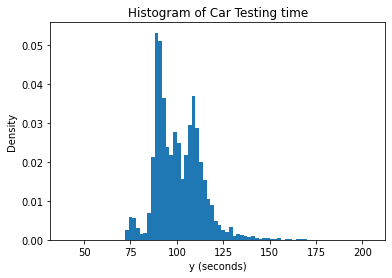

In [11]:
plt.hist(car_data['y'],
         bins = list(range(40,205,2)),
         density=True, stacked=True)
plt.title('Histogram of Car Testing time')
plt.xlabel('y (seconds)')
plt.ylabel('Density')
plt.show()

In [12]:
car_data.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### Observations: 

- Distribution is not normal. 
- There are mulptiple peaks in density. 
- mean value distribution is around 100sec
- There are peaks around 75, 90 and 110sec
- Min value is 72 sec
- Max value is 265 sec
- 50% of the data are having testing time in range [90.82,109] seconds

### Observations from EDA

- Features ID and X4 can be removed as it has no impact on the target variable y.
- X0,X1,X2,X3,X5,X6 and X8 has impact on y. We can binary encode these features to feed into ML model.
- Features in range X10 to X385 will be filtered based on variance and correlation. feature which has variance<0.0125 and correlation > 0.9 with other features will be removed.
- We can remove 56 features which are duplicates.

### Performance metric:

To measure the performance of the model we need to compare its predictions with the ground truth. In the given dataset we have target variable 'y' which is continuous. For a continuous value prediction, we can evaluate Mean Square error/RMSE, Mean Absolute Error or R-squared (Coefficient of determintion) to check the performance of the model. As part of the kaggle competition, we need to evaluate Rsquared score. For the study we will consider additional metric RMSE to check model performance and compare different models.

Metrics considered for study:

- R Squared score

    $ R^2 = 1 - \frac{SS_r}{SS_t} $

    $ where $

    $ SS_r = \sum(y-ypred)^2 $

    $ SS_t = \sum(y-ymean)^2 $
     
    From this score, we can quickly tell how good the model. We need not compare with score of other model score.
    Here score itself is evaluated by comparing the error of the model with a model which predicts mean value all the time. 
    
    Thus we have,
    
    R^2 = 1 => Best model
    
    R^2 = 0 => Worst model, 
    The worst model will have SS_r = SS_t, this implies our model is equivalent to mean value predicting model.
    
   
- Root Mean Squared Error
    
    $ RMSE = \sqrt{\frac{\sum(y-ypred)^2}{N}} $

    RMSE = 0 => Best model

    RMSE > high value  => worst model

Unlike Rsquared value we cannot tell how worst the model is by just looking at the RMSE value


### Feature Engineering

Here we will modify the feature based on the observation we made in EDA section.

#### We will remove features 'ID' and 'X4'

In [13]:
#Droping ID, X4 and y columns from feature data for further processing. y calues captured in another data frame.
car_data_new_X = car_data.drop(['ID','X4','y'],axis=1)
car_data_new_y = car_data['y']

In [14]:
car_data_new_y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

#### Removing the 56 duplicate features

In [15]:
# Identifying the duplicate feature names and storing them in numpy array
duplicate_feat = list(car_data_new_X.T[car_data_new_X.T.duplicated()].index)#.to_numpy()

In [16]:
# Duplicate feature list and the count)
duplicate_feat,len(duplicate_feat)

(['X35',
  'X37',
  'X39',
  'X76',
  'X84',
  'X93',
  'X94',
  'X102',
  'X107',
  'X113',
  'X119',
  'X122',
  'X134',
  'X146',
  'X147',
  'X172',
  'X199',
  'X213',
  'X214',
  'X216',
  'X222',
  'X226',
  'X227',
  'X232',
  'X233',
  'X235',
  'X239',
  'X242',
  'X243',
  'X244',
  'X245',
  'X247',
  'X248',
  'X253',
  'X254',
  'X262',
  'X266',
  'X268',
  'X279',
  'X289',
  'X290',
  'X293',
  'X296',
  'X297',
  'X299',
  'X302',
  'X320',
  'X324',
  'X326',
  'X330',
  'X347',
  'X360',
  'X364',
  'X365',
  'X382',
  'X385'],
 56)

In [17]:
# Dropping Duplicate features from dataset
car_data_new_X = car_data_new_X.drop(duplicate_feat,axis=1)

### Train test split

The test data provided cannot be used to check the performance as it doesnt contain the target variable. 
Performance can be only be known by submitting model prediction of test data on kaggle. 
Our model needs to perform well on test data provided to us. For this we need to train our model with all the data.

But to check performance of a trained model ourself we need to test the model on unseen data. 
So we will split the data to train and test. We will consider 10% of train data provided to us as test data . 

Feature engineering will be done on train data. Test data will be unseen data for our model for which we can check the model perfromance.

In [18]:
# from sklearn.model_selection import train_test_split

In [19]:
# # Train test split of data after duplicate feature removal
# X_train, X_test, y_train, y_test = train_test_split(car_data_new_X, 
#                                                     car_data_new_y, 
#                                                     test_size=0.1, 
#                                                     random_state=42)

We will use all available rows for training

In [20]:
X_train,y_train = car_data_new_X,car_data_new_y

##### Feature Engineering of Train data

For further processing we will consider X_train

#### Variance check for Binary value features

In [21]:
# Evaluate variance of all binary features (column 7 and above in X_train data)
variance_data = X_train.iloc[:,7:].var()
# variance_data = car_data_new_X.iloc[:,7:].var()

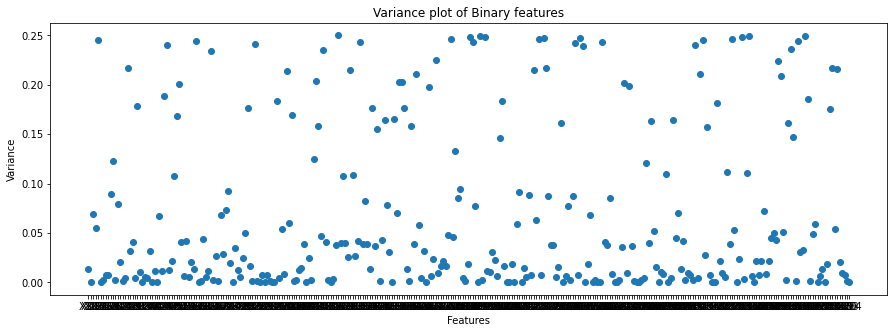

In [22]:
# Scatter plot of variance of each feature
plt.figure(figsize=(15,5))
plt.scatter(variance_data.index,variance_data)
plt.title('Variance plot of Binary features')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.show()

From plot we can observe that there are lot of features which have variance close to zero(the inference we had in bar plot).
We will drop the features which have variance close to zero

Let us consider 5% of max variance as low variance threshold and see how is the distribution of 0s and 1s among the feature for the least variance feature.

In [23]:
# Max value of variance of features
variance_data.describe()['max']

0.25003568308722546

In [24]:
# Getting list of features which have variance value above 5% of max variance(0.25)
Feature_Bi_list = variance_data[variance_data>0.05*variance_data.describe()['max']].index

In [25]:
# list of selected features and their variance
X_train[Feature_Bi_list].var().sort_values()
# car_data_new_X[Feature_Bi_list].var().sort_values()

X47     0.012668
X106    0.012900
X305    0.013131
X10     0.013131
X57     0.013131
          ...   
X186    0.248764
X191    0.249212
X362    0.249647
X337    0.249787
X127    0.250036
Length: 194, dtype: float64

In [26]:
# value count of least variance feature
X_train['X106'].value_counts()

0    4154
1      55
Name: X106, dtype: int64

In [27]:
# value count of max variance feature
X_train['X127'].value_counts()

0    2125
1    2084
Name: X127, dtype: int64

We are sure that feature category(0/1) will have population count of atleast 50.

In [28]:
# Getting list of features which have variance value below 5% of max variance(0.25) 
Feature_Bi_reject = variance_data[variance_data<0.05*variance_data.describe()['max']].index

In [29]:
# list of features to be rejected
Feature_Bi_reject

Index(['X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X32',
       ...
       'X353', 'X357', 'X366', 'X369', 'X370', 'X372', 'X379', 'X380', 'X383',
       'X384'],
      dtype='object', length=118)

We will capture filtered features in variable car_data_X_train

In [30]:
# Droping Rejected from Train data
car_data_X_train = X_train.drop(Feature_Bi_reject,axis =1)
# car_data_X_train = car_data_new_X.drop(Feature_Bi_reject,axis =1)

In [31]:
print('Number of Binary features droped for low variance : ',len(Feature_Bi_reject))

Number of Binary features droped for low variance :  118


### Feature Correlation

We need to check for features which are related each other as one of them will be redundant feature. One we to check the relationship two features is to find their correlation. We will evaluate pearson correlation of features available in pandas.
if correlation is in range [0,1] , then two features are linearly dependent on each other with positive slope,
else if correlation is in range [-1,0], then two features are linearly dependent on each other with negative slope,
if it is zero then there is no correlation. 

In [32]:
# correlation evaluation of filtered dataset
Correlation_mat = car_data_X_train.corr('pearson')

In [33]:
abs(Correlation_mat.iloc[120:130,120:130])

,X224,X225,X228,X229,X231,X234,X238,X241,X246,X250
X224,1.000000,0.087111,0.071366,0.066034,0.042169,0.340239,0.167656,0.079576,0.193173,0.746977
X225,0.087111,1.000000,0.124917,0.121892,0.028079,0.076639,0.013853,0.190736,0.022832,0.097822
X228,0.071366,0.124917,1.000000,0.987535,0.032628,0.095096,0.333291,0.161926,0.029625,0.090551
X229,0.066034,0.121892,0.987535,1.000000,0.031631,0.093419,0.332372,0.170766,0.032648,0.094909
X231,0.042169,0.028079,0.032628,0.031631,1.000000,0.017453,0.038772,0.021583,0.015956,0.021205
X234,0.340239,0.076639,0.095096,0.093419,0.017453,1.000000,0.139275,0.138926,0.271581,0.443724
X238,0.167656,0.013853,0.333291,0.332372,0.038772,0.139275,1.000000,0.155392,0.091507,0.067509
X241,0.079576,0.190736,0.161926,0.170766,0.021583,0.138926,0.155392,1.000000,0.240732,0.134100
X246,0.193173,0.022832,0.029625,0.032648,0.015956,0.271581,0.091507,0.240732,1.000000,0.136619
X250,0.746977,0.097822,0.090551,0.094909,0.021205,0.443724,0.067509,0.134100,0.136619,1.000000


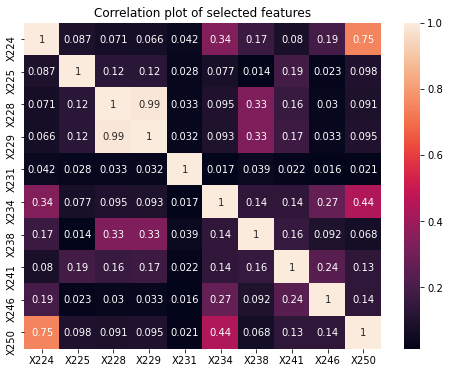

In [34]:
# Correlation heatmap on subset of features. Example plot as the feature size is large.
plt.figure(figsize=(8,6))
sb.heatmap(abs(Correlation_mat.iloc[120:130,120:130]),annot=True)
plt.title('Correlation plot of selected features')
plt.show()

We will list out features which have high correlation (>=0.9). For this we need to check only the lower or upper triangle of correlation matrix. For example in the above plot we will consider 'X229' which have 0.99 in the lower triangle and drop it from features list while retaining the feature 'X228'. Similarly feature 'X251' will be dropped.

In [35]:
def get_corr_features(corr_mat):
    '''This function returns feature list which have correlation above 0.9 for a given correlation matrix'''
    # list to store correlated features
    feature_correlated = []
    for i in range(len(corr_mat)):
        for j in range(i) : #This loop repeats only till one step before j=i, Thus captures information from
                            #lower triangle matrix. 
            if((corr_mat.iloc[i,j]>=0.9) and (corr_mat.columns[i] not in feature_correlated)):
                # features with correlation above 0.9 added to list. 
                feature_correlated.append(corr_mat.columns[i])
    return feature_correlated

In [36]:
# Correlation matrix of filtered train data passed to get_corr_features function to get list of features with high correlation.
feature_correlated = get_corr_features(Correlation_mat)

In [37]:
feature_correlated

['X54',
 'X66',
 'X101',
 'X120',
 'X129',
 'X137',
 'X140',
 'X150',
 'X162',
 'X194',
 'X198',
 'X215',
 'X219',
 'X238',
 'X250',
 'X251',
 'X263',
 'X264',
 'X265',
 'X272',
 'X276',
 'X311',
 'X314',
 'X328',
 'X346',
 'X348',
 'X352',
 'X358',
 'X362',
 'X363',
 'X367',
 'X368',
 'X371',
 'X378']

In [38]:
print('Number of features to be removed because of high correlation(>0.9):',len(feature_correlated))

Number of features to be removed because of high correlation(>0.9): 34


In [39]:
car_data_X_train = car_data_X_train.drop(feature_correlated,axis=1) 

In [40]:
print('Number of features after above feature removals : ',car_data_X_train.shape)

Number of features after above feature removals :  (4209, 167)


In [41]:
car_data_X_train.shape

(4209, 167)

In [42]:
car_data_X_train.iloc[:,7:]

,X10,X12,X13,X14,X19,X20,X22,X23,X27,X28,...,X354,X355,X356,X359,X361,X373,X374,X375,X376,X377
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
4205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4206,0,1,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
4207,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### Feature Filtering

As the number of Binary features are high, we will consider reducing number of features by selecting the features which help in improving the R^2 value of a ML model. We will consider random forest regressor model for the filtering. 
We will use 100 trees as estimators in Randomforest with max depth of 10 and min samples split count of 5 so as to avoid overfitting. The splitting criteria for trees is means squared error.
                                       
The features are initially assigned with uniform weights. 10 features are selected probabilistically based on their weights. The weights value are increased or decreased based on the feature impact on the scoring of the model. Score is mean of 3-fold cross validation score. When weights cross a threshold value, the feature is selected as best feature. This is repeated for 2000 epochs. We will end the loop if 100 features are selected before 2000 epochs

Reference for this approach of Forward feature selection:
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/36390

In [ ]:
def feature_filter(data_X,data_Y,epochs):
    '''This function selects features based on its impact on R^2 score of a random forest regressor model'''
    # Creating Feature list of Binary features 
    feat_set = list(data_X.columns)
    feat_count = len(feat_set)
    feat_wts_dict = dict() #dictionary to store weights for each feature
    
    # Weight Threshold for feature selection
    feat_wt_threshold = 0.1
    
    # Initially assign uniform weights to each feature
    for feat in feat_set:
        feat_wts_dict[feat] = 1/feat_count
    
    scores = list()    
    best_features = list()   
    
    # increment factor to be added to weights when they improve the validation scores of the model
    # if there is no improvement, the weight is reduced by same factor
    feat_factor = 0.2
    
    for i in tqdm(range(epochs)):
    
        # Random feature selection based on their weights and without replacement
        random_feat = np.random.choice(feat_set, size=10, replace=False, p = list(feat_wts_dict.values()))    
        
        # Random forest regressor model definition
        X = data_X[random_feat]
        y = data_Y
        rf_clf = RandomForestRegressor(n_estimators=100,
                                       criterion='mse',
                                       max_depth=10,
                                       min_samples_split=5)
        
        # K fold Cross validation of the model
        score = np.mean(cross_val_score(rf_clf, X,y,cv = 3, scoring='r2',n_jobs=-1))
        scores.append(score)
        
        # Increasing / Decreasing weightage based on results cross validation from previous 25 iterations
        if (i>24):
            if score>np.mean(scores[-25:]):
                for feat in random_feat:
                    feat_wts_dict[feat] *= (1+feat_factor)
            
            else:
                for feat in random_feat:
                    feat_wts_dict[feat] *= (1-feat_factor)
            
            # normalize feature weights after modifying the feature weights based on scoring 
            wt_sum = sum(feat_wts_dict.values())
            for feat in feat_set:
                feat_wts_dict[feat] /= wt_sum
        
        # Adding feature to Best feature list
        if max(feat_wts_dict.values())> feat_wt_threshold:
            
            # list of features which has weights more than threshold are considered as best features
            for feat in feat_set:
                if feat_wts_dict[feat] > feat_wt_threshold:
                    #adding feature to best feature list
                    best_features.append(feat)
        
                    # remove best features from feat_set and corresponding weights for next iteration
                    feat_set.remove(feat)
                    del feat_wts_dict[feat]
            
            # update feature weights after removing the best features from feature set
            wt_sum = sum(feat_wts_dict.values())
            for feat in feat_set:
                feat_wts_dict[feat] /= wt_sum
            
        if (len(best_features)>99):
            print('100 features are selected as Best Features.\nFeature Selection loop terminated...')
            break
    
    print('Number of features selected after %d epochs are : %d' %(i+1,len(best_features)))
    
    return best_features,scores

In [ ]:
# Getting the best binary features from car_data_X_train using feature filter which is run for 2000 epochs
best_features,scores = feature_filter(car_data_X_train.iloc[:,7:],y_train,2000)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [07:52<00:00,  4.24it/s]

Number of features selected after 2000 epochs are : 95


#### Best features selected from above iteration

In [ ]:
print('Best Binary features :', best_features)

In [43]:
best_features = ['X189', 'X261', 'X127', 'X313', 'X316', 'X29', 'X136', 'X128', 'X191', 'X350', 'X157', 'X159', 'X234', 'X275', 'X171', 'X156', 'X178', 'X31', 'X315', 'X118', 'X48', 'X148', 'X223', 'X103', 'X185', 'X28', 'X43', 'X334', 'X186', 'X224', 'X187', 'X14', 'X132', 'X51', 'X80', 'X256', 'X46', 'X108', 'X300', 'X286', 'X47', 'X218', 'X180', 'X337', 'X100', 'X64', 'X377', 'X354', 'X168', 'X158', 'X163', 'X273', 'X114', 'X246', 'X304', 'X351', 'X179', 'X45', 'X115', 'X155', 'X19', 'X202', 'X12', 'X126', 'X49', 'X355', 'X349', 'X336', 'X151', 'X98', 'X331', 'X81', 'X142', 'X130', 'X306', 'X22', 'X69', 'X96', 'X111', 'X220', 'X376', 'X68', 'X13', 'X75', 'X85', 'X343', 'X255', 'X203', 'X71', 'X197', 'X61', 'X301', 'X285', 'X27', 'X208']

In [44]:
len(best_features)

95

In [45]:
# List of features which are rejected
feature_filter_rejected = car_data_X_train.iloc[:,7:].drop(best_features,axis =1).columns
feature_filter_rejected

Index(['X10', 'X20', 'X23', 'X38', 'X50', 'X52', 'X56', 'X57', 'X58', 'X70',
       'X73', 'X79', 'X82', 'X106', 'X109', 'X116', 'X117', 'X131', 'X133',
       'X135', 'X138', 'X139', 'X141', 'X143', 'X144', 'X152', 'X154', 'X161',
       'X164', 'X166', 'X170', 'X174', 'X175', 'X176', 'X177', 'X181', 'X182',
       'X201', 'X206', 'X209', 'X211', 'X225', 'X228', 'X229', 'X231', 'X241',
       'X283', 'X284', 'X287', 'X294', 'X305', 'X321', 'X322', 'X327', 'X329',
       'X333', 'X340', 'X342', 'X345', 'X356', 'X359', 'X361', 'X373', 'X374',
       'X375'],
      dtype='object')

#### r2 score of the random forest model with best binary feature

In [46]:
# Model Definition
rf_reg = RandomForestRegressor(n_estimators=100,
                               criterion='mse',
                               max_depth=10,
                               min_samples_split=5)

In [47]:
# Fitting the model only for best binary features.
rf_reg.fit(car_data_X_train[best_features],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [48]:
# capturing feature and its importance from regressor model in pandas series
feat_imp = pd.Series(rf_reg.feature_importances_ ,index = best_features).sort_values()

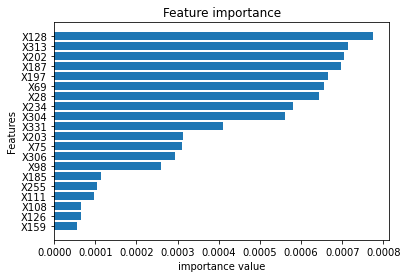

In [49]:
# Ploting feature importance in bar chart
plt.barh(feat_imp.index[:20],feat_imp.iloc[:20])
plt.xlabel('importance value')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

#### Train data r2 score

In [50]:
# Evaluating R^2 score for the predictions of above model on train data
r2_score(car_data_new_y, rf_reg.predict(car_data_X_train[best_features]))

0.6528135607532406

#### Validation score

In [51]:
# Evaluating r2 score through cross validation of above model
score = np.mean(cross_val_score(rf_reg,car_data_X_train[best_features],y_train,cv = 3, scoring='r2'))
score

0.5407277961028645

#### The above score can be considered as Baseline. 

### Combining the categorical features with selected best features

In [53]:
# Concatenating Best binary features with categorical features
car_data_X_train = pd.concat([car_data_X_train.iloc[:,0:7],car_data_X_train[best_features]],axis=1)
car_data_X_train.head()

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,k,v,at,a,u,j,o,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,k,t,av,e,y,l,o,1,0,1,...,0,0,0,0,0,1,0,1,1,0
2,az,w,n,c,x,j,x,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,az,t,n,f,x,l,e,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,az,v,n,f,h,d,n,0,0,0,...,0,0,0,0,0,1,0,0,1,0


### Binary encoding of categorical features

All categorical feature needs to be encoded such that it can be fed into ML model.

We will consider Binary encoding of these features.

In [54]:
# Binary Encoder Definition for categorical feature. 
# drop_invariant set to true to avoid generating columns with no variance
Bi_encoder_X0 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X1 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X2 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X3 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X4 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X5 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X6 = ce.BinaryEncoder(drop_invariant=True)
Bi_encoder_X8 = ce.BinaryEncoder(drop_invariant=True)

Fit and transform of features X0,X1,X2,X3,X4,X5,X6 and X8

In [55]:
# Fitting encoder and Transforming the categorical feature in train data
X0_bi = Bi_encoder_X0.fit_transform(car_data_X_train['X0'])
X1_bi = Bi_encoder_X1.fit_transform(car_data_X_train['X1'])
X2_bi = Bi_encoder_X2.fit_transform(car_data_X_train['X2'])
X3_bi = Bi_encoder_X3.fit_transform(car_data_X_train['X3'])
# feature X4 is not considered. Refer EDA section
X5_bi = Bi_encoder_X5.fit_transform(car_data_X_train['X5'])
X6_bi = Bi_encoder_X6.fit_transform(car_data_X_train['X6'])
X8_bi = Bi_encoder_X8.fit_transform(car_data_X_train['X8'])

In [54]:
X0_bi.shape[1]+X1_bi.shape[1]+X2_bi.shape[1]+X3_bi.shape[1]+X5_bi.shape[1]+X6_bi.shape[1]+X8_bi.shape[1]

34

We have 34 features generated based on categorical features

In [57]:
Bi_encoder_list = [Bi_encoder_X0,
                   Bi_encoder_X1,
                   Bi_encoder_X2,
                   Bi_encoder_X3,
                   Bi_encoder_X5,
                   Bi_encoder_X6,
                   Bi_encoder_X8]

In [61]:
joblib.dump(Bi_encoder_list,'binary_encoders.joblib')

['binary_encoders.joblib']

### New Dataframe to capture Encoded categorical feature with Filtered Binary features  

In [62]:
# Contcatenating encoded feature with binary features
car_data_X_train = pd.concat([X0_bi,X1_bi,X2_bi,X3_bi,X5_bi,X6_bi,X8_bi,car_data_X_train[best_features]],axis=1)
car_data_X_train.head()

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [63]:
# Final size of filtered and encoded train data
car_data_X_train.shape

(4209, 129)

After Binary Feature filter and Feature encoding of train data, we have 134 features

In [64]:
# car_data_X_train.to_csv('data_filter_encode.csv')

#### Importance of Encoded features

In EDA section, we had made note on training Random forest model to predict time based on categorical features which are encoded.

We will study importance of Encoded features and impact on r^2 score of the model in this section.

In [65]:
car_data_X_train.iloc[:,0:34].head(10)

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X5_4,X6_0,X6_1,X6_2,X6_3,X8_0,X8_1,X8_2,X8_3,X8_4
0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
5,0,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
6,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
7,0,0,0,1,0,1,0,0,1,1,...,0,0,0,0,1,0,0,1,1,0
8,0,0,0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,1,1,1
9,0,0,0,1,1,1,0,0,1,0,...,0,0,1,1,0,0,0,0,1,1


We will train a random forest regressor model to understand their importance

In [63]:
# Random forest Model definition 
rf_reg_enc = RandomForestRegressor(n_estimators=100,
                                   criterion='mse',
                                   max_depth=10,
                                   min_samples_split=5)

In [64]:
# Fitting the model on Binary encoded features only
rf_reg_enc.fit(car_data_X_train.iloc[:,0:34],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [65]:
# Capturing the feature importance of Binary encoded features in pandas series
feat_imp_enc = pd.Series(rf_reg_enc.feature_importances_ ,index = car_data_X_train.iloc[:,0:34].columns).sort_values()

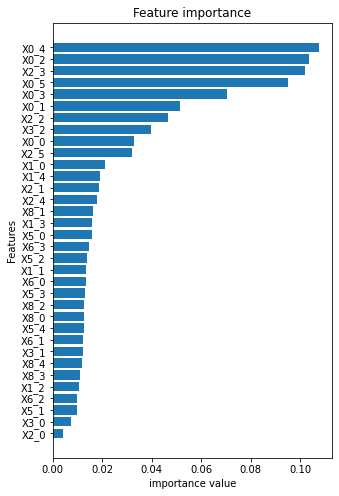

In [66]:
# Feature importance plot of Binary encoded features
plt.figure(figsize=(5,8))
plt.barh(feat_imp_enc.index,feat_imp_enc.iloc)
plt.xlabel('importance value')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

We can observe top important features are X0 and X2. other features X3,X5,X6 and X8 do have importance in contribution which is not insignificant.

Thus we will not remove any encoded feature.

#### Binary Encoded Feature Train data r2 score

In [67]:
# r2 score evaluation on train data for model with encoded feature alone
r2_score(car_data_new_y, rf_reg_enc.predict(car_data_X_train.iloc[:,0:34]))

0.7295353617047775

#### Binary Encoded Feature Validation score

In [68]:
# Cross validation score evaluation for model with encoded feature
score = np.mean(cross_val_score(rf_reg_enc,car_data_X_train.iloc[:,0:34],y_train,cv = 3, scoring='r2'))
score

0.46113010458453196

When we consider encoded feature alone, model fits on the train data better than the best binary features selected earlier
but the validation score is lower

In [69]:
# car_data_X_train.iloc[:,34:]

In [70]:
car_data_X_train

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
4205,0,0,0,1,1,1,0,1,1,1,...,1,1,0,0,0,1,0,0,0,0
4206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
4207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


### Target Encoding of categorical Features

Target encoder assigns the mean value of target variable y grouped under each category of a given feature

In [66]:
# Target Encoder definition
X0_encdr = ce.TargetEncoder()
X1_encdr = ce.TargetEncoder()
X2_encdr = ce.TargetEncoder()
X3_encdr = ce.TargetEncoder()
X5_encdr = ce.TargetEncoder()
X6_encdr = ce.TargetEncoder()
X8_encdr = ce.TargetEncoder()

In [67]:
# Fit and Transform train data using the above encoder
X0_enc_ft = X0_encdr.fit_transform(X_train['X0'],y_train)
X1_enc_ft = X1_encdr.fit_transform(X_train['X1'],y_train)
X2_enc_ft = X2_encdr.fit_transform(X_train['X2'],y_train)
X3_enc_ft = X3_encdr.fit_transform(X_train['X3'],y_train)
X5_enc_ft = X5_encdr.fit_transform(X_train['X5'],y_train)
X6_enc_ft = X6_encdr.fit_transform(X_train['X6'],y_train)
X8_enc_ft = X8_encdr.fit_transform(X_train['X8'],y_train)

In [68]:
Target_encoder_list = [X0_encdr,
                       X1_encdr,
                       X2_encdr,
                       X3_encdr,
                       X5_encdr,
                       X6_encdr,
                       X8_encdr]

In [69]:
joblib.dump(Target_encoder_list,'target_encoders.joblib')

['target_encoders.joblib']

### New Dataframe to capture Target encoded features and Best Binary features

In [70]:
car_data_X_train_enc = pd.concat([X0_enc_ft, X1_enc_ft, X2_enc_ft, X3_enc_ft, X5_enc_ft, X6_enc_ft,X8_enc_ft,
                                  car_data_X_train[best_features]], axis = 1)

In [71]:
car_data_X_train_enc.head()

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,99.491872,101.412574,104.194580,102.507477,100.669318,101.165245,97.746933,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,1,0,1,...,0,0,0,0,0,1,0,1,1,0
2,78.025543,95.764808,83.369927,101.959269,84.418384,101.165245,98.577238,0,0,0,...,0,0,0,1,0,1,0,0,1,0
3,78.025543,93.723226,83.369927,96.564507,84.418384,98.945502,104.976311,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [72]:
# car_data_X_train_enc.to_csv('data_filter_tg_encode.csv')

Similar to Binary encoding, we will train a random forest regressor model to understand importance of target encoding.

In [73]:
# Random forest Model definition 
rf_reg_enc_tgenc = RandomForestRegressor(n_estimators=100,
                                   criterion='mse',
                                   max_depth=10,
                                   min_samples_split=5)

In [74]:
# Fitting the model on target encoded features only
rf_reg_enc_tgenc.fit(car_data_X_train_enc.iloc[:,0:7],y_train)

RandomForestRegressor(max_depth=10, min_samples_split=5)

In [75]:
# Capturing the feature importance of target encoded features in pandas series
feat_imp_tgenc = pd.Series(rf_reg_enc_tgenc.feature_importances_ ,index = car_data_X_train_enc.iloc[:,0:7].columns).sort_values()

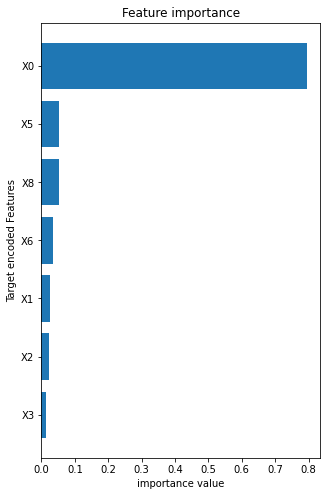

In [76]:
# Feature importance plot of target encoded features
plt.figure(figsize=(5,8))
plt.barh(feat_imp_tgenc.index,feat_imp_tgenc.iloc)
plt.xlabel('importance value')
plt.ylabel('Target encoded Features')
plt.title('Feature importance')
plt.show()

We can observe top important features are X0 and X8 while X3 is least among the Seven categorical features. Other features X1,X2,X3,X5 and X6 do have importance in contribution which is not insignificant.

We will consider all the 7 categorical features for model training.

#### Target Encoded Feature Train data r2 score

In [77]:
# r2 score evaluation on train data for model with encoded feature alone
r2_score(y_train, rf_reg_enc_tgenc.predict(car_data_X_train_enc.iloc[:,0:7]))

0.7171891110447384

#### Target Encoded Feature Validation score

In [78]:
# Cross validation score evaluation for model with encoded feature
score = np.mean(cross_val_score(rf_reg_enc_tgenc,car_data_X_train_enc.iloc[:,0:7],y_train,cv = 3, scoring='r2'))
score

0.548638358180357

From Cross validation we observe that it is better than Binary encoded feature. 

We will train Seperate models for Target encoded and Binary encoded data.

### Local Outlier Factor

We will study if the given data has outliers.
We will evaluate local outlier factor for each row and list out which has value far away from one (LOF>>|1|)

LOF of Xi = (Average LRD of Neighbours of Xi)/ (LRD of Xi)

where,

LRD = Local Reachability density = (Number of neigbours of given point / sum of reachability distances)

reachability distance = max distance of neighbour from a given point.

LRD signifies how crowded is the neighbourhood of the selected point.
When LRD is high for neighbours and comparitively lesser for a given point then the given point is probably outlier.

We will consider 10 neighbours to a given data point to evaluate LOF value

In [79]:
# defining LOF evaluator function and predicting outliers
LOF_clf = LocalOutlierFactor(n_neighbors=10)
LOF_pred = LOF_clf.fit_predict(car_data_X_train_enc,y_train)

In [80]:
# Storing identified outlier rows by the LOF classifier
outlier_car_row = []
for i in range(len(car_data_X_train_enc)):
    if LOF_pred[i] == -1 :
        outlier_car_row.append(i)
print('Outliers index identified by model fit_predict :\n',outlier_car_row)

Outliers index identified by model fit_predict :
 [0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 48, 49, 50, 56, 64, 73, 77, 92, 94, 117, 121, 122, 127, 131, 143, 145, 149, 159, 161, 190, 199, 220, 227, 239, 307, 316, 320, 333, 342, 350, 354, 375, 380, 405, 408, 424, 439, 440, 451, 455, 459, 464, 469, 470, 497, 510, 524, 539, 547, 563, 586, 591, 599, 606, 611, 613, 620, 626, 631, 640, 676, 683, 685, 689, 696, 714, 726, 737, 738, 757, 768, 772, 806, 811, 830, 865, 867, 879, 884, 887, 905, 910, 917, 923, 932, 934, 940, 963, 980, 985, 1034, 1043, 1047, 1049, 1051, 1053, 1057, 1060, 1062, 1070, 1071, 1079, 1082, 1099, 1108, 1113, 1143, 1155, 1158, 1160, 1161, 1186, 1193, 1215, 1236, 1250, 1266, 1294, 1316, 1345, 1352, 1356, 1362, 1408, 1415, 1420, 1425, 1430, 1453, 1456, 1472, 1477, 1478, 1495, 1518, 1528, 1573, 1588, 1596, 1603, 1610, 1614, 1617, 1624, 1639, 1643, 1661, 1662, 1713, 1714, 1718, 1732, 1762, 1763, 1769, 1790, 1803, 1828, 1888, 1899, 1906, 1923, 1941, 1955, 2002, 2008, 2017, 2024, 2026, 20

In [81]:
max(abs(LOF_clf.negative_outlier_factor_))

7.735408433304525

#### We will check the rows which have LOF  (negative_outlier_factor_) < -1.5 

In [82]:
# Identifying outlier based on negative outlier factor and storing in a dictionary with absolute outlier factor value
outlier_car = dict()
for i in range(len(car_data_X_train_enc)):
    if LOF_clf.negative_outlier_factor_[i]<-1.5:
        outlier_car[i] = abs(LOF_clf.negative_outlier_factor_[i])

In [83]:
# list of outliers based on negative outlier factor
outlier_car.keys()

dict_keys([0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 48, 49, 50, 56, 64, 73, 77, 92, 94, 117, 121, 122, 127, 131, 143, 145, 149, 159, 161, 190, 199, 220, 227, 239, 307, 316, 320, 333, 342, 350, 354, 375, 380, 405, 408, 424, 439, 440, 451, 455, 459, 464, 469, 470, 497, 510, 524, 539, 547, 563, 586, 591, 599, 606, 611, 613, 620, 626, 631, 640, 676, 683, 685, 689, 696, 714, 726, 737, 738, 757, 768, 772, 806, 811, 830, 865, 867, 879, 884, 887, 905, 910, 917, 923, 932, 934, 940, 963, 980, 985, 1034, 1043, 1047, 1049, 1051, 1053, 1057, 1060, 1062, 1070, 1071, 1079, 1082, 1099, 1108, 1113, 1143, 1155, 1158, 1160, 1161, 1186, 1193, 1215, 1236, 1250, 1266, 1294, 1316, 1345, 1352, 1356, 1362, 1408, 1415, 1420, 1425, 1430, 1453, 1456, 1472, 1477, 1478, 1495, 1518, 1528, 1573, 1588, 1596, 1603, 1610, 1614, 1617, 1624, 1639, 1643, 1661, 1662, 1713, 1714, 1718, 1732, 1762, 1763, 1769, 1790, 1803, 1828, 1888, 1899, 1906, 1923, 1941, 1955, 2002, 2008, 2017, 2024, 2026, 2033, 2056, 2076, 2094, 2109, 2134, 2137, 

In [84]:
len(outlier_car_row),len(outlier_car)

(328, 328)

#### It is observed that both fit predict and negative outlier factor (<-1.5) identifies same set of outliers

In [85]:
# listing outlier car values
LOF = np.array(list(outlier_car.values()))

In [86]:
#Sorting outlier factor values
LOF.sort()

In [87]:
LOF

array([1.50144982, 1.50222297, 1.50307329, 1.5049931 , 1.50503942,
       1.50731257, 1.5078604 , 1.50924279, 1.50928754, 1.51220124,
       1.51226148, 1.51389274, 1.51439784, 1.51473263, 1.51475408,
       1.51688539, 1.51777847, 1.51834073, 1.51846408, 1.52028611,
       1.5212419 , 1.52207855, 1.52221905, 1.52228912, 1.52243529,
       1.52274172, 1.52357517, 1.5240587 , 1.52608029, 1.53124782,
       1.53152031, 1.53196088, 1.53203942, 1.53481411, 1.53617035,
       1.53855826, 1.53898452, 1.54032976, 1.54484805, 1.54500343,
       1.54541308, 1.54550353, 1.54620151, 1.54763046, 1.54763046,
       1.54802865, 1.54833026, 1.54917261, 1.54942121, 1.5516579 ,
       1.5555533 , 1.5576329 , 1.56028813, 1.56213278, 1.56213278,
       1.56444924, 1.56455309, 1.56481888, 1.56520507, 1.56581128,
       1.56591752, 1.5685389 , 1.56872906, 1.56968255, 1.57253396,
       1.57391968, 1.57893333, 1.57913891, 1.57935352, 1.58382126,
       1.58495768, 1.58708735, 1.58909473, 1.59210253, 1.59516

Max y value among outliers

In [88]:
# maximum value of testing time among the outliers
max(y_train.iloc[list(outlier_car.keys())])

169.91

Observed: One with max testing time which is far away from mean testing time is not considered as outlier by the LOF calculation

In [89]:
# maximum value of testing time of all train data
max(y_train)

265.32

In [90]:
# car data with maximum testing time 
car_data_X_train[y_train == max(y_train)]

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
883,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [91]:
for i in range(len(car_data_X_train_enc)):
    if car_data_X_train_enc.iloc[[i]].index[0]==883:
        print('Row number of max y value: ', i)
        break

Row number of max y value:  883


In [92]:
# Outlier factor of row index 883 (y = 265sec)
LOF_pred[883],LOF_clf.negative_outlier_factor_[883]

(1, -1.0507660521789721)

#### Outliers for Binary encoded features data

In [93]:
LOF_clf_bi = LocalOutlierFactor(n_neighbors=10,) 
LOF_pred_bi = LOF_clf_bi.fit_predict(car_data_X_train,y_train)

In [94]:
# Storing identified outlier rows by the LOF classifier
outlier_car_row_bi = []
for i in range(len(car_data_X_train)):
    if LOF_pred_bi[i] == -1 :
        outlier_car_row_bi.append(i)
print('Outliers index identified by model fit_predict :\n',outlier_car_row_bi)

Outliers index identified by model fit_predict :
 [3, 37, 49, 85, 89, 117, 128, 149, 173, 179, 190, 216, 299, 327, 403, 424, 440, 455, 459, 470, 499, 510, 582, 588, 676, 678, 749, 795, 864, 872, 1039, 1060, 1070, 1096, 1108, 1253, 1266, 1279, 1345, 1362, 1379, 1388, 1414, 1415, 1451, 1523, 1603, 1662, 1709, 1711, 1732, 1740, 1770, 1931, 1957, 1965, 1992, 2012, 2068, 2108, 2123, 2137, 2173, 2195, 2268, 2276, 2292, 2300, 2312, 2320, 2333, 2352, 2574, 2580, 2613, 2661, 2713, 2724, 2835, 3093, 3183, 3185, 3199, 3221, 3239, 3294, 3392, 3492, 3506, 3507, 3510, 3610, 3668, 3766, 3857, 3880, 3920, 4005, 4090, 4098, 4106, 4116, 4131, 4185]


In [95]:
#### Outliers for Binary encoded features data
LOF_clf_bi = LocalOutlierFactor(n_neighbors=10,) 
LOF_pred_bi = LOF_clf_bi.fit_predict(car_data_X_train,y_train)

# Storing identified outlier rows by the LOF classifier
outlier_car_row_bi = []
for i in range(len(car_data_X_train)):
    if LOF_pred_bi[i] == -1 :
        outlier_car_row_bi.append(i)
print('Outliers index identified by model fit_predict :\n',outlier_car_row_bi)

Outliers index identified by model fit_predict :
 [3, 37, 49, 85, 89, 117, 128, 149, 173, 179, 190, 216, 299, 327, 403, 424, 440, 455, 459, 470, 499, 510, 582, 588, 676, 678, 749, 795, 864, 872, 1039, 1060, 1070, 1096, 1108, 1253, 1266, 1279, 1345, 1362, 1379, 1388, 1414, 1415, 1451, 1523, 1603, 1662, 1709, 1711, 1732, 1740, 1770, 1931, 1957, 1965, 1992, 2012, 2068, 2108, 2123, 2137, 2173, 2195, 2268, 2276, 2292, 2300, 2312, 2320, 2333, 2352, 2574, 2580, 2613, 2661, 2713, 2724, 2835, 3093, 3183, 3185, 3199, 3221, 3239, 3294, 3392, 3492, 3506, 3507, 3510, 3610, 3668, 3766, 3857, 3880, 3920, 4005, 4090, 4098, 4106, 4116, 4131, 4185]


### Removing outliers from train data

We had initially studied ML models performance without removing any outliers.(Case_Study_1_FE_ML_Sachin_BU_2.ipynb)

Now we will study the effect of removing the identified outliers from the dataset on ML model.

We will remove outliers from train data as they were identified among training data

#### Outliers of Binary encoded features

In [96]:
print(outlier_car_row_bi)

[3, 37, 49, 85, 89, 117, 128, 149, 173, 179, 190, 216, 299, 327, 403, 424, 440, 455, 459, 470, 499, 510, 582, 588, 676, 678, 749, 795, 864, 872, 1039, 1060, 1070, 1096, 1108, 1253, 1266, 1279, 1345, 1362, 1379, 1388, 1414, 1415, 1451, 1523, 1603, 1662, 1709, 1711, 1732, 1740, 1770, 1931, 1957, 1965, 1992, 2012, 2068, 2108, 2123, 2137, 2173, 2195, 2268, 2276, 2292, 2300, 2312, 2320, 2333, 2352, 2574, 2580, 2613, 2661, 2713, 2724, 2835, 3093, 3183, 3185, 3199, 3221, 3239, 3294, 3392, 3492, 3506, 3507, 3510, 3610, 3668, 3766, 3857, 3880, 3920, 4005, 4090, 4098, 4106, 4116, 4131, 4185]


In [97]:
outlier_car_row_bi_idx = car_data_X_train.iloc[outlier_car_row_bi].index.values

In [98]:
# outlier_car_row_bi_idx

### Dropping Outliers of Binary encoded features dataset

In [99]:
car_data_X_train = car_data_X_train.drop(outlier_car_row_bi_idx,axis=0)

In [100]:
car_data_y_train = y_train.drop(outlier_car_row_bi_idx,axis=0)

In [101]:
car_data_X_train

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,1,0
4205,0,0,0,1,1,1,0,1,1,1,...,1,1,0,0,0,1,0,0,0,0
4206,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,1,0
4207,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [102]:
car_data_y_train

0       130.81
1        88.53
2        76.26
4        78.02
5        92.93
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4105, dtype: float64

#### Outliers of Target encoded features

In [103]:
print(outlier_car_row)

[0, 2, 3, 5, 6, 7, 8, 9, 10, 12, 48, 49, 50, 56, 64, 73, 77, 92, 94, 117, 121, 122, 127, 131, 143, 145, 149, 159, 161, 190, 199, 220, 227, 239, 307, 316, 320, 333, 342, 350, 354, 375, 380, 405, 408, 424, 439, 440, 451, 455, 459, 464, 469, 470, 497, 510, 524, 539, 547, 563, 586, 591, 599, 606, 611, 613, 620, 626, 631, 640, 676, 683, 685, 689, 696, 714, 726, 737, 738, 757, 768, 772, 806, 811, 830, 865, 867, 879, 884, 887, 905, 910, 917, 923, 932, 934, 940, 963, 980, 985, 1034, 1043, 1047, 1049, 1051, 1053, 1057, 1060, 1062, 1070, 1071, 1079, 1082, 1099, 1108, 1113, 1143, 1155, 1158, 1160, 1161, 1186, 1193, 1215, 1236, 1250, 1266, 1294, 1316, 1345, 1352, 1356, 1362, 1408, 1415, 1420, 1425, 1430, 1453, 1456, 1472, 1477, 1478, 1495, 1518, 1528, 1573, 1588, 1596, 1603, 1610, 1614, 1617, 1624, 1639, 1643, 1661, 1662, 1713, 1714, 1718, 1732, 1762, 1763, 1769, 1790, 1803, 1828, 1888, 1899, 1906, 1923, 1941, 1955, 2002, 2008, 2017, 2024, 2026, 2033, 2056, 2076, 2094, 2109, 2134, 2137, 2187, 2188

In [104]:
outlier_car_row_idx = car_data_X_train_enc.iloc[outlier_car_row].index.values

In [105]:
outlier_car_row_idx.shape

(328,)

### Dropping Outliers of Target encoded features from dataset

In [106]:
# Dropping Outliers from dataset
car_data_X_train_enc = car_data_X_train_enc.drop(outlier_car_row_idx,axis=0)

In [107]:
car_data_X_train_enc

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,1,0,1,...,0,0,0,0,0,1,0,1,1,0
4,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11,93.221343,100.095378,98.080370,96.564507,105.582108,103.134842,97.746933,1,0,1,...,0,0,0,0,0,1,0,0,0,0
13,93.221343,100.095378,98.080370,96.564507,100.931360,103.134842,97.746933,1,0,1,...,0,0,0,0,0,1,0,0,0,0
14,94.618699,101.868462,103.732453,100.033190,100.931360,100.306286,100.486194,1,0,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,112.552235,101.868462,103.732453,101.959269,98.672500,101.346464,102.551197,1,1,0,...,0,0,0,0,0,1,0,1,1,0
4205,112.072707,96.316707,109.617931,105.114414,98.672500,103.134842,103.446154,0,0,0,...,1,1,0,0,0,1,0,0,0,0
4206,112.552235,101.412574,108.393464,102.507477,98.672500,100.306286,104.976311,1,1,0,...,0,0,0,1,0,1,0,1,1,0
4207,93.221343,100.095378,98.080370,96.564507,98.672500,98.945502,101.156723,1,0,1,...,0,0,0,0,0,1,1,0,0,0


In [108]:
car_data_y_train_enc = y_train.drop(outlier_car_row_idx,axis=0)

In [109]:
car_data_y_train_enc

1        88.53
4        78.02
11       98.12
13       94.12
14       99.15
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 3881, dtype: float64

### Dimensionality reduction

We will consider Matrix decomposition of feature matrix using PCA,SVD and ICA techniques.

With these techniques data is transformed to new set of dimensions which have basis vector that are orthogonal/independent to eachother.
  
We will consider number of components as 20 for each of the reduction techniques and do fit and transform on filtered and target encoded features. 

And Finally combine all 60 features(20x3) as our new features of our data. We will check and remove correlated features. These filtered set of feature will be used for model training.

Ref https://www.kaggle.com/hakeem/stacked-then-averaged-models-0-5697

#### PCA

In [110]:
# Principal Component Analysis definition, fit and transform of filtered and target encoded feature data
pca = PCA(n_components = 20)
car_data_pca = pca.fit_transform(car_data_X_train_enc)
car_data_pca_df = pd.DataFrame(car_data_pca, index=list(car_data_X_train_enc.index))

In [111]:
joblib.dump(pca,'pca_transformer.joblib')

['pca_transformer.joblib']

In [112]:
# Shape of the PCA trasnformed data
car_data_pca_df.shape

(3881, 20)

In [113]:
# Percentage of total variance of original data explained by 20 PCA components
sum(pca.explained_variance_ratio_)

0.979875038426291

In [114]:
# Example of PCA transformed data 
car_data_pca_df.iloc[0:2,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,3.671332,3.956192,2.619092,6.251032,-2.106335,0.501848,-0.336015,1.815277,1.419590,-0.465801,-0.662417,-0.00201,0.180576,0.529186,-0.297307,-0.430260,-0.665854,0.089039,-0.628906,-0.725387
4,27.680235,5.857728,0.751045,-2.956837,3.563246,-1.286326,0.139682,-0.783253,1.001522,2.594791,2.648806,-0.79382,-0.371868,0.707318,-0.106290,0.208714,0.105447,-0.152814,-0.171037,0.128229


In [115]:
# column names for the newly generated PCA components
car_data_pca_df.columns = [('pca_'+str(i)) for i in range(20)]
# car_data_pca_df

#### truncated SVD

In [116]:
# truncated SVD definition, fit and transform of filtered and target encoded feature data
tSVD = TruncatedSVD(n_components = 20)
car_data_tsvd = tSVD.fit_transform(car_data_X_train_enc)
car_data_tsvd_df = pd.DataFrame(car_data_tsvd, index=list(car_data_X_train_enc.index))

In [117]:
joblib.dump(tSVD,'tSVD_transformer.joblib')

['tSVD_transformer.joblib']

In [118]:
# Percentage of total variance of original data explained by 20 tSVD components
sum(tSVD.explained_variance_ratio_)

0.9797443255534914

In [119]:
# Example of tSVD transformed data 
car_data_tsvd_df.iloc[0:2,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1,259.454308,-0.290756,2.614735,3.734032,2.672794,2.765265,0.22925,1.329123,1.196643,-0.855717,-0.328738,0.189089,0.173101,-0.479796,-0.061395,-0.472151,-0.374196,0.179687,-0.595858,-0.859411
4,250.823832,22.912763,6.953470,-3.605155,1.941992,-1.710188,-1.02971,-0.311767,1.136947,2.320956,2.843019,-0.974011,-0.371471,-0.752072,-0.092642,0.209352,0.044813,-0.176109,-0.171321,0.154681


In [120]:
# column names for the newly generated tSVD components
car_data_tsvd_df.columns = [('tSVD_'+str(i)) for i in range(20)]
# car_data_tsvd_df

#### ICA

In [121]:
# Independent Component Analysis definition, fit and target transform of filtered and target encoded feature data
F_ica = FastICA(n_components = 20)
car_data_fica = F_ica.fit_transform(car_data_X_train_enc)
car_data_fica_df = pd.DataFrame(car_data_fica, index=list(car_data_X_train_enc.index))

In [122]:
joblib.dump(F_ica,'F_ica_transformer.joblib')

['F_ica_transformer.joblib']

In [123]:
# column names for the newly generated ICA components
car_data_fica_df.columns = [('ica_'+str(i)) for i in range(20)]
# car_data_fica_df

Combining all dimensionally reduced features

In [124]:
# Concatenating the PCA, tSVD and FastICA components 
dim_redn_feat = pd.concat([car_data_pca_df,
                           car_data_tsvd_df,
                           car_data_fica_df],axis=1)

In [125]:
# Shape of combined Dimensionaly reduced features
dim_redn_feat.shape

(3881, 60)

In [126]:
# # Finding correlated features among Dimensionally reduced features
# Dim_redn_corr_feat = get_corr_features(dim_redn_feat.corr())
# Dim_redn_corr_feat

In [127]:
Dim_redn_corr_feat = ['tSVD_0',
                      'tSVD_1',
                      'tSVD_2',
                      'tSVD_3',
                      'tSVD_7',
                      'tSVD_9',
                      'tSVD_10',
                      'tSVD_11',
                      'tSVD_12',
                      'tSVD_14',
                      'tSVD_15',
                      'tSVD_17',
                      'tSVD_18',
                      'tSVD_19']

In [128]:
# removing features which have high correlation
car_data_dim_redn = dim_redn_feat.drop(Dim_redn_corr_feat,axis=1)

In [129]:
# Final Dimsionality reduction features
car_data_dim_redn.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19
1,3.671332,3.956192,2.619092,6.251032,-2.106335,0.501848,-0.336015,1.815277,1.419590,-0.465801,...,-0.017403,-0.006570,0.005096,-0.002850,-0.006283,-0.003516,-0.031169,-0.022803,0.005949,0.047834
4,27.680235,5.857728,0.751045,-2.956837,3.563246,-1.286326,0.139682,-0.783253,1.001522,2.594791,...,0.016781,0.001902,-0.009439,0.009583,0.090378,0.003797,-0.001091,0.004427,-0.017296,-0.001375
11,8.173500,-0.790635,3.851443,-0.625304,-2.390611,-1.236620,4.988647,-1.849707,-1.020320,-0.148399,...,0.014948,0.004904,0.021105,0.063159,0.000204,-0.013084,-0.015596,0.005374,0.005782,-0.005890
13,8.187482,-0.783726,3.905926,-0.650248,-2.153011,-1.108779,0.384326,-2.283349,-1.247575,-0.252116,...,0.018605,0.001272,0.019738,0.005594,0.000210,-0.013477,-0.015294,0.004620,-0.003246,-0.006150
14,3.923258,-5.494296,-0.003145,-1.801617,-0.002371,-0.585135,0.071906,1.052851,0.947257,-0.058581,...,0.024668,0.006481,-0.002186,0.003329,-0.001175,-0.019578,-0.005331,-0.005977,0.015716,0.000060


In [130]:
# Feature list of dimensionality reduction data
car_data_dim_redn.columns

Index(['pca_0', 'pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6', 'pca_7',
       'pca_8', 'pca_9', 'pca_10', 'pca_11', 'pca_12', 'pca_13', 'pca_14',
       'pca_15', 'pca_16', 'pca_17', 'pca_18', 'pca_19', 'tSVD_4', 'tSVD_5',
       'tSVD_6', 'tSVD_8', 'tSVD_13', 'tSVD_16', 'ica_0', 'ica_1', 'ica_2',
       'ica_3', 'ica_4', 'ica_5', 'ica_6', 'ica_7', 'ica_8', 'ica_9', 'ica_10',
       'ica_11', 'ica_12', 'ica_13', 'ica_14', 'ica_15', 'ica_16', 'ica_17',
       'ica_18', 'ica_19'],
      dtype='object')

Only few tSVD components are considered with new set of features after correlation check 

#### 2 and 3 way interaction of binary features

We will check if there are any two or three feature interactions that have correlation with the target variable.
Here we will make use of combinations module from itertools to generate list of 2 and 3 combinations of feature names. 

We iterate over the generated list to add values of particular combination of features and then check its correlation with the target variable. feature combination with correlation above 0.65 are considered as new feature(based on reference below).

Ref https://medium.com/analytics-vidhya/detailed-solution-to-mercedes-benz-green-manufacturing-competition-on-kaggle-7b85c84a3ff5

For creating the combination we will consider all the features before filtering based on variance, correlation and encoding (X_train) as there might be correlation to target variable when they are combined with others even though feature variance is low.

In [131]:
# capturing the binary features from X_train data (data before filtering operations)
car_data_bi_ft = X_train.iloc[:,7:]

In [132]:
car_data_bi_ft.shape

(4209, 312)

In [133]:
# listing out column names of binary feature.
Binary_ft = car_data_bi_ft.columns

In [75]:
# Generating tuples of two and three feature combination using column names 
two_feat_combi = list(combinations(Binary_ft,2))
three_feat_combi = list(combinations(Binary_ft,3))

In [92]:
print('Number of possible two feature combination: ',len(two_feat_combi))
print('Number of possible three feature combination: ',len(three_feat_combi))

Number of possible two feature combination:  48516
Number of possible three feature combination:  5013320


In [93]:
# Examples of 2 and 3 feature combinations
two_feat_combi[:2],three_feat_combi[:2]

([('X10', 'X11'), ('X10', 'X12')],
 [('X10', 'X11', 'X12'), ('X10', 'X11', 'X13')])

#### Two way feature interaction

In [ ]:
# Evaluating correlation between two feature combinations and target value
two_ft = dict()
for i,j in tqdm(two_feat_combi):
    two_ft_corr = (car_data_bi_ft[i]+car_data_bi_ft[j]).corr(y_train)
    if(two_ft_corr>0.65):
        two_ft[i+'_'+j] = two_ft_corr

100%|██████████████████████████████████████████████████████████████████████████| 47586/47586 [00:25<00:00, 1878.71it/s]


In [ ]:
# list of identified 2 feature combinations
two_ft

{'X136_X314': 0.6535845567652394,
 'X263_X314': 0.6582783696750025,
 'X314_X315': 0.6584270395369155}

In [134]:
#hardcoded list as backup
two_feat_selc = ['X136_X314',#: 0.6587693114637183,
                 'X263_X314',#: 0.6630212818971395,
                 'X314_X315']#: 0.6659108718978796}

In [135]:
# Generating dataframe for selected 2 feature combinations 
two_feat_dict = dict()
for feat in two_feat_selc:
    ft_list = feat.split('_')
    two_feat_dict[feat] = car_data_bi_ft[ft_list[0]]+car_data_bi_ft[ft_list[1]]
two_feat_df = pd.DataFrame(two_feat_dict)

In [136]:
two_feat_df.head()

,X136_X314,X263_X314,X314_X315
0,1,1,0
1,1,1,0
2,0,0,0
3,0,0,0
4,0,0,0


##### Droping Outliers (target encoded)

In [137]:
two_feat_df = two_feat_df.drop(outlier_car_row_idx,axis=0)
two_feat_df

,X136_X314,X263_X314,X314_X315
1,1,1,0
4,0,0,0
11,1,1,0
13,1,1,0
14,1,1,0
...,...,...,...
4204,2,2,1
4205,2,2,1
4206,2,2,1
4207,1,1,0


#### Three way feature interaction

In [ ]:
# Evaluating correlation between three feature combinations and target value
three_ft = dict()
for i,j,k in tqdm(three_feat_combi):
    three_ft_corr = (car_data_bi_ft[i]+car_data_bi_ft[j]+car_data_bi_ft[k]).corr(y_train)
    if(three_ft_corr>0.65):
        three_ft[i+'_'+j+'_'+k] = three_ft_corr

100%|████████████████████████████████████████████████████████████████████| 4869634/4869634 [1:04:39<00:00, 1255.23it/s]


In [ ]:
# list of identified 3 feature combinations
three_ft

{'X15_X136_X314': 0.6533833133867724,
 'X15_X263_X314': 0.6580672084451846,
 'X15_X314_X315': 0.6580921595629214,
 'X16_X136_X314': 0.6513330300040183,
 'X16_X263_X314': 0.6559761109873904,
 'X16_X314_X315': 0.6553458898228404,
 'X18_X136_X314': 0.651315582592616,
 'X18_X263_X314': 0.655981842212537,
 'X18_X314_X315': 0.6524730141062377,
 'X21_X136_X314': 0.6536571177685789,
 'X21_X263_X314': 0.6583259720646162,
 'X21_X314_X315': 0.6584485695010808,
 'X24_X136_X314': 0.6520356065557436,
 'X24_X263_X314': 0.6567164173507009,
 'X24_X314_X315': 0.6553642120114871,
 'X26_X263_X314': 0.6518574077321175,
 'X30_X263_X314': 0.6506149609344892,
 'X30_X314_X315': 0.650304053702878,
 'X33_X136_X314': 0.6530881364625144,
 'X33_X263_X314': 0.6577809967462251,
 'X33_X314_X315': 0.6578990005358393,
 'X34_X136_X314': 0.6508155459244218,
 'X34_X263_X314': 0.6554295252984985,
 'X34_X314_X315': 0.6532442657922608,
 'X36_X263_X314': 0.6518117377257929,
 'X36_X314_X315': 0.6506041674988104,
 'X40_X136_X314

In [ ]:
len(three_ft)

334

There are 334 feature combination identified by the correlation check which is large compared to filtered feature counts. So we will consider only top 10 feature combination identified.

In [ ]:
# listing out top 10 three feature combinations
count=0
for feat in three_ft.keys():
    if(three_ft[feat]>0.663):
        print(feat)#,three_ft[feat])
        count+=1
print(count)

X47_X263_X314
X62_X263_X314
X136_X221_X314
X136_X261_X315
X136_X314_X315
X221_X263_X314
X261_X263_X315
X263_X267_X314
X263_X314_X315
X263_X314_X344
10


In [138]:
#hardcoded list as backup
three_feat_selc = ['X47_X263_X314',
                   'X62_X263_X314',
                   'X136_X221_X314',
                   'X136_X261_X315',
                   'X136_X314_X315',
                   'X221_X263_X314',
                   'X261_X263_X315',
                   'X263_X267_X314',
                   'X263_X314_X315',
                   'X263_X314_X344']

In [139]:
# Generating dataframe for selected 3 feature combinations 
three_feat_dict = dict()
for feat in three_feat_selc:
    ft_list = feat.split('_')
    three_feat_dict[feat] = car_data_bi_ft[ft_list[0]]+car_data_bi_ft[ft_list[1]]+car_data_bi_ft[ft_list[2]]
three_feat_df = pd.DataFrame(three_feat_dict)

In [140]:
three_feat_df.head()

,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
0,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


##### Droping Outliers (target encoded)

In [141]:
three_feat_df = three_feat_df.drop(outlier_car_row_idx,axis=0)
three_feat_df

,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0
11,1,1,1,1,1,1,1,1,1,1
13,1,1,1,1,1,1,1,1,1,1
14,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
4204,2,2,2,2,2,2,2,2,2,2
4205,2,2,2,1,2,2,1,2,2,2
4206,2,2,2,2,2,2,2,2,2,2
4207,1,1,1,1,1,1,1,1,1,1


### Feature combinations

Saving feature combinations in specific variable name: (Source of data : X_train)

car_data_f1 for Binary encoded categorical Feature + Filtered Features

car_data_f2 for Target encoded categorical Feature + Filtered Features

car_data_f3 for Target encoded categorical Feature + Filtered Features + 2/3 wayfeature interaction

car_data_f4 for Dimensionality Reduction features (Target encoded + Feature filtered data)

car_data_f5 for Dimensionality Reduction features (Target encoded + Feature filtered data) + 2/3 way feature interaction

#### Binary encoded categorical Feature + Filtered Features

In [142]:
car_data_f1 = car_data_X_train
car_data_f1.head()

,X0_0,X0_1,X0_2,X0_3,X0_4,X0_5,X1_0,X1_1,X1_2,X1_3,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
5,0,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


#### Target encoded categorical Feature + Filtered Features

In [143]:
car_data_f2 = car_data_X_train_enc
car_data_f2.head()

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X343,X255,X203,X71,X197,X61,X301,X285,X27,X208
1,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,1,0,1,...,0,0,0,0,0,1,0,1,1,0
4,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,0,0,0,...,0,0,0,0,0,1,0,0,1,0
11,93.221343,100.095378,98.080370,96.564507,105.582108,103.134842,97.746933,1,0,1,...,0,0,0,0,0,1,0,0,0,0
13,93.221343,100.095378,98.080370,96.564507,100.931360,103.134842,97.746933,1,0,1,...,0,0,0,0,0,1,0,0,0,0
14,94.618699,101.868462,103.732453,100.033190,100.931360,100.306286,100.486194,1,0,1,...,0,0,0,0,0,1,0,1,1,0


#### Target encoded categorical Feature + Filtered Features + 2/3 wayfeature interaction

In [144]:
car_data_f3 = pd.concat([car_data_X_train_enc,two_feat_df,three_feat_df],axis=1)
car_data_f3.head()

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
1,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,1,0,1,...,1,1,1,1,1,1,1,1,1,1
4,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,93.221343,100.095378,98.080370,96.564507,105.582108,103.134842,97.746933,1,0,1,...,1,1,1,1,1,1,1,1,1,1
13,93.221343,100.095378,98.080370,96.564507,100.931360,103.134842,97.746933,1,0,1,...,1,1,1,1,1,1,1,1,1,1
14,94.618699,101.868462,103.732453,100.033190,100.931360,100.306286,100.486194,1,0,1,...,1,1,1,1,1,1,1,1,1,1


#### Dimensionality Reduction features

In [145]:
car_data_f4 = car_data_dim_redn.copy()
car_data_f4.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19
1,3.671332,3.956192,2.619092,6.251032,-2.106335,0.501848,-0.336015,1.815277,1.419590,-0.465801,...,-0.017403,-0.006570,0.005096,-0.002850,-0.006283,-0.003516,-0.031169,-0.022803,0.005949,0.047834
4,27.680235,5.857728,0.751045,-2.956837,3.563246,-1.286326,0.139682,-0.783253,1.001522,2.594791,...,0.016781,0.001902,-0.009439,0.009583,0.090378,0.003797,-0.001091,0.004427,-0.017296,-0.001375
11,8.173500,-0.790635,3.851443,-0.625304,-2.390611,-1.236620,4.988647,-1.849707,-1.020320,-0.148399,...,0.014948,0.004904,0.021105,0.063159,0.000204,-0.013084,-0.015596,0.005374,0.005782,-0.005890
13,8.187482,-0.783726,3.905926,-0.650248,-2.153011,-1.108779,0.384326,-2.283349,-1.247575,-0.252116,...,0.018605,0.001272,0.019738,0.005594,0.000210,-0.013477,-0.015294,0.004620,-0.003246,-0.006150
14,3.923258,-5.494296,-0.003145,-1.801617,-0.002371,-0.585135,0.071906,1.052851,0.947257,-0.058581,...,0.024668,0.006481,-0.002186,0.003329,-0.001175,-0.019578,-0.005331,-0.005977,0.015716,0.000060


#### Dimensionality Reduction features + 2/3 way feature interaction

In [146]:
car_data_f5 = car_data_dim_redn.copy()

In [147]:
car_data_f5 = pd.concat([car_data_f5,two_feat_df,three_feat_df],axis=1)
car_data_f5.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,X47_X263_X314,X62_X263_X314,X136_X221_X314,X136_X261_X315,X136_X314_X315,X221_X263_X314,X261_X263_X315,X263_X267_X314,X263_X314_X315,X263_X314_X344
1,3.671332,3.956192,2.619092,6.251032,-2.106335,0.501848,-0.336015,1.815277,1.419590,-0.465801,...,1,1,1,1,1,1,1,1,1,1
4,27.680235,5.857728,0.751045,-2.956837,3.563246,-1.286326,0.139682,-0.783253,1.001522,2.594791,...,0,0,0,0,0,0,0,0,0,0
11,8.173500,-0.790635,3.851443,-0.625304,-2.390611,-1.236620,4.988647,-1.849707,-1.020320,-0.148399,...,1,1,1,1,1,1,1,1,1,1
13,8.187482,-0.783726,3.905926,-0.650248,-2.153011,-1.108779,0.384326,-2.283349,-1.247575,-0.252116,...,1,1,1,1,1,1,1,1,1,1
14,3.923258,-5.494296,-0.003145,-1.801617,-0.002371,-0.585135,0.071906,1.052851,0.947257,-0.058581,...,1,1,1,1,1,1,1,1,1,1


In [148]:
car_data_f1.shape,car_data_f2.shape,car_data_f3.shape,car_data_f4.shape,car_data_f5.shape

((4105, 129), (3881, 102), (3881, 115), (3881, 46), (3881, 59))

In [149]:
# !pip install prettytable 

In [150]:
def features_f1(X):
    ''' This function transforms categorical data to binary encoded features and adds best feature'''
    X0_bi = Bi_encoder_X0.transform(X['X0'])
    X1_bi = Bi_encoder_X1.transform(X['X1'])
    X2_bi = Bi_encoder_X2.transform(X['X2'])
    X3_bi = Bi_encoder_X3.transform(X['X3'])
    X5_bi = Bi_encoder_X5.transform(X['X5'])
    X6_bi = Bi_encoder_X6.transform(X['X6'])
    X8_bi = Bi_encoder_X8.transform(X['X8'])
    
    X_mod = pd.concat([X0_bi,
                       X1_bi,
                       X2_bi,
                       X3_bi,
                       X5_bi,
                       X6_bi,
                       X8_bi,
                       X[best_features]],axis=1)
    
    return X_mod

In [151]:
def features_f2(X):
    ''' This function transforms categorical data to target encoded features and adds best feature'''
    X0_tgenc = X0_encdr.transform(X['X0'])
    X1_tgenc = X1_encdr.transform(X['X1'])
    X2_tgenc = X2_encdr.transform(X['X2'])
    X3_tgenc = X3_encdr.transform(X['X3'])
    X5_tgenc = X5_encdr.transform(X['X5'])
    X6_tgenc = X6_encdr.transform(X['X6'])
    X8_tgenc = X8_encdr.transform(X['X8'])
    
    X_mod = pd.concat([X0_tgenc,
                       X1_tgenc,
                       X2_tgenc,
                       X3_tgenc,
                       X5_tgenc,
                       X6_tgenc,
                       X8_tgenc,
                       X[best_features]],axis=1)
    
    return X_mod

In [152]:
def features_f3(X):
    ''' This function transforms categorical data to target encoded features, 
    adds best feature and two & three way interaction features '''
    
    X_1 = features_f2(X)
    
    # Generating dataframe for selected 2 feature combinations 
    two_feat_dict = dict()
    for feat in two_feat_selc:
        ft_list = feat.split('_')
        two_feat_dict[feat] = X[ft_list[0]] + X[ft_list[1]]
    two_feat_df = pd.DataFrame(two_feat_dict)
    
    # Generating dataframe for selected 3 feature combinations 
    three_feat_dict = dict()
    for feat in three_feat_selc:
        ft_list = feat.split('_')
        three_feat_dict[feat] = X[ft_list[0]] + X[ft_list[1]] + X[ft_list[2]]
    three_feat_df = pd.DataFrame(three_feat_dict)
    
    X_mod = pd.concat([X_1,
                       two_feat_df,
                       three_feat_df],axis=1)
    
    return X_mod

In [153]:
def features_f4(X):
    ''' This function transforms target encoded features and best feature to Dimensional Reduction features '''
    
    X = features_f2(X)
    
    X_pca = pca.transform(X)
    X_pca_df = pd.DataFrame(X_pca, index=list(X.index))
    X_pca_df.columns = [('pca_'+str(i)) for i in range(20)]
    
    X_tSVD = tSVD.transform(X)
    X_tSVD_df = pd.DataFrame(X_tSVD, index=list(X.index))
    X_tSVD_df.columns = [('tSVD_'+str(i)) for i in range(20)]
    
    X_Fica = F_ica.transform(X)
    X_Fica_df = pd.DataFrame(X_Fica, index=list(X.index))
    X_Fica_df.columns = [('ica_'+str(i)) for i in range(20)]
    
    X_mod = pd.concat([X_pca_df,
                       X_tSVD_df,
                       X_Fica_df,],axis=1)
    
    X_mod = X_mod.drop(Dim_redn_corr_feat,axis=1)
    
    return X_mod

In [154]:
def features_f5(X):
    ''' This function generates the Dimensional Reduction features and adds two and three way features '''
    
    X1 = features_f2(X)
    
    X_pca = pca.transform(X1)
    X_pca_df = pd.DataFrame(X_pca, index=list(X1.index))
    X_pca_df.columns = [('pca_'+str(i)) for i in range(20)]
    
    X_tSVD = tSVD.transform(X1)
    X_tSVD_df = pd.DataFrame(X_tSVD, index=list(X1.index))
    X_tSVD_df.columns = [('tSVD_'+str(i)) for i in range(20)]
    
    X_Fica = F_ica.transform(X1)
    X_Fica_df = pd.DataFrame(X_Fica, index=list(X1.index))
    X_Fica_df.columns = [('ica_'+str(i)) for i in range(20)]
    
    # Generating dataframe for selected 2 feature combinations 
    two_feat_dict = dict()
    for feat in two_feat_selc:
        ft_list = feat.split('_')
        two_feat_dict[feat] = X[ft_list[0]] + X[ft_list[1]]
    two_feat_df = pd.DataFrame(two_feat_dict)
    
    # Generating dataframe for selected 3 feature combinations 
    three_feat_dict = dict()
    for feat in three_feat_selc:
        ft_list = feat.split('_')
        three_feat_dict[feat] = X[ft_list[0]] + X[ft_list[1]] + X[ft_list[2]]
    three_feat_df = pd.DataFrame(three_feat_dict)
    
    X_mod = pd.concat([X_pca_df,
                       X_tSVD_df,
                       X_Fica_df,
                       two_feat_df,
                       three_feat_df],axis=1)
    
    X_mod = X_mod.drop(Dim_redn_corr_feat,axis=1)
    
    return X_mod

In [155]:
def score_heatmap(df,param_1,param_2,score):
        '''This function returns heatmap of score in grid of prameters of a model'''
        rows = np.sort(df[param_1].unique())
        columns = np.sort(df[param_2].unique())
        mat = np.zeros((len(rows),len(columns)))
      
        for i in range(len(rows)):
            for j in range(len(columns)):
                for k in range(len(df)):
                    if (df[param_1].iloc[k] == rows[i] and 
                        df[param_2].iloc[k] == columns[j]):
                        mat[i][j] = df[score].iloc[k] 
      
        scores_df = pd.DataFrame(mat,columns = columns, index = rows)
      
        plt.figure(figsize=(6,5))
        sb.heatmap(scores_df,annot=True)
        plt.ylabel(param_1)
        plt.xlabel(param_2)
        plt.title(score)
        plt.show()

In [156]:
def generate_test_data_csv(featurize_name,model,data,link):
    '''This function generates test data predictions in spreadsheet and saves in link'''
    
    if(featurize_name == 'f1'):
        data_mod = features_f1(data)
        
    elif(featurize_name == 'f2'):
        data_mod = features_f2(data)
        
    elif(featurize_name == 'f3'):
        data_mod = features_f3(data)
        
    elif(featurize_name == 'f4'):
        data_mod = features_f4(data)
        
    elif(featurize_name == 'f5'):
        data_mod = features_f5(data)
    
    elif(featurize_name == 'f3_f4'):
        data_mod3 = features_f3(data)
        data_mod4 = features_f4(data)
        data_mod = pd.concat([data_mod3,data_mod4],axis=1)
        
    elif(featurize_name == 'f1_f5'):
        data_mod1 = features_f1(data)
        data_mod5 = features_f5(data)
        data_mod = pd.concat([data_mod1,data_mod5],axis=1)
        
    pred = model.predict(data_mod)
    
    predictions = pd.DataFrame({'ID' : data.ID.values,
                                 'y' : pred})
    
    predictions.to_csv(link,index = False)

# ML Models

Based on the above Feature engineering we will Train Machine learning model and see which feature combinations can help us predict the Testing time of a car configuration.

We will construct following Models all the feature combinations:

1. Random Forest 

2. GBDT (LightGBM)

3. ExtraTree

4. Elasticnet

5. Stacked Models

6. XGBoost

7. Support Vector Regression

8. Custom Stacked Models

9. Stacked model on combined features

10. Custom Stacked Models on combined features

11. Custom Stacked Model with one base model repeated k times 

Refer: 

Case_Study_1_FE_ML_Sachin_BU_1_olr.ipynb for 1-5 models training and prediction details.

Case_Study_1_FE_ML_Sachin_BU_2_olr.ipynb for 6-10 models training and prediction details.

Case_Study_1_FE_ML_Sachin_BU_3_olr.ipynb for 11th model training and prediction details.

# Models with best kaggle scores

Here we will consider models which had highest kaggle score and train them on All the data available

1. Random Forest with features F3 (kaggle score: 0.55027)
   - Training the same model
   - Gridsearch for best parameters (Train with new best parameters)


2. ExtraTree with features F3_F4 (kaggle score: 0.5499)
   - Training the same model
   - Gridsearch for best max_sample parameter
   - Gridsearch for best min_impurity_decrease parameter
   
   
3. Random Forest with features F2 (kaggle score: 0.54935)
   - Training the same model
   - Gridsearch for best parameters (Train with new best parameters)
   
   
4. Stacked model (StackingCVregressor)

   - Based on ExtraTree, 100 decision trees with parameters same as extratrees are considered as Base models and Ridge Regression    as Meta model


5. Custom Stacking

   - Based on ExtraTree, 100 decision trees with parameters same as extratrees are considered as Base models and Ridge          Regression as Meta model. (Train data split to D1 and D2 (50-50) for Base and Meta model training)
      
   - 150 decision trees + Ridge Regression (Train data split to D1 and D2 (60-40) for Base and Meta model training)
     sampling percentage = 0.9
   
   - Based on Stacked model of feature set F3

## 1. Random Forest with features F3

### C. Training on Filtered + Target Encoded feature + 2/3 way interaction features data

In [228]:
# Best model from train data split
Reg_Model_CV_3.best_params_

{'n_estimators': 250,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_depth': 5}

In [158]:
rf_reg_f3 = RandomForestRegressor(n_estimators= 250,
                                  min_samples_split= 6,
                                  min_samples_leaf= 4,
                                  max_depth= 5)

In [159]:
rf_reg_f3.fit(car_data_f3,car_data_y_train_enc)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                      n_estimators=250)

##### Train split Score

In [160]:
rf_f3_r2train = rf_reg_f3.score(car_data_f3,car_data_y_train_enc)
rf_f3_r2train

0.595773027626289

##### RMSE Score

In [161]:
rf_f3_rmse_train = mean_squared_error(car_data_y_train_enc, rf_reg_f3.predict(car_data_f3),squared = False)
rf_f3_rmse_train

7.997119022725987

##### Predictions Histogram plot

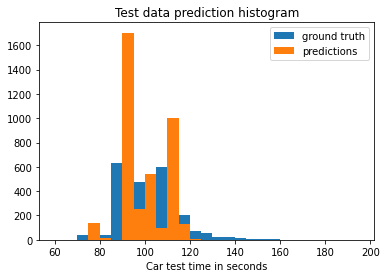

In [189]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(rf_reg_f3.predict(car_data_f3), bins = range(60,200,5), label='predictions')
plt.title('Test data prediction histogram')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

In [169]:
car_data_y_train_enc.shape,rf_reg_f3.predict(car_data_f3).shape

((3881,), (3881,))

#### Kaggle score of Random forest model - rf_reg_f3

In [163]:
generate_test_data_csv('f3', rf_reg_f3 , car_data_test, 'test_data_predictions_olr_fd\RF_F3_fd_predicts_olr.csv')

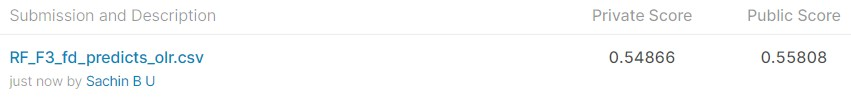

In [3]:
display.Image("test_data_predictions_olr_fd\RF_F3_fd_predicts_olr.jpg")

### Best model selection for full data for RF_F3

In [233]:
rf_reg_f3 = RandomForestRegressor(criterion='mse')

In [234]:
params = {'n_estimators':[10,50,100,150,200,250,300],
          'max_depth':[5,10,15,20,25],
          'min_samples_split':[2,3,4,5,6],
          'min_samples_leaf':[1,2,3,4,5,],
          }

In [235]:
Reg_Model_CV_3 = RandomizedSearchCV(rf_reg_f3, 
                                    params,
                                    cv = 30,
                                    scoring='r2',
                                    n_iter = 15,
                                    n_jobs = -1, 
                                    verbose = 5, 
                                    random_state = 25,
                                    return_train_score=True)

##### Best Model Selection for car_data_f3

In [236]:
Reg_Model_CV_3.fit(car_data_f3,car_data_y_train_enc)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


RandomizedSearchCV(cv=30, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300]},
                   random_state=25, return_train_score=True, scoring='r2',
                   verbose=5)

In [237]:
cv_results_f3 = pd.DataFrame.from_dict(Reg_Model_CV_3.cv_results_)
cv_results_f3

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,2.700451,0.272743,0.013972,0.005583,50,6,3,20,"{'n_estimators': 50, 'min_samples_split': 6, '...",0.676759,...,0.787257,0.777046,0.776654,0.777949,0.783027,0.777741,0.777831,0.780723,0.781075,0.004841
1,0.435385,0.042352,0.009673,0.008822,10,5,4,10,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.682807,...,0.675930,0.672756,0.680098,0.670365,0.677260,0.675473,0.681474,0.678077,0.677567,0.005507
2,0.250073,0.018477,0.008248,0.008159,10,4,2,5,"{'n_estimators': 10, 'min_samples_split': 4, '...",0.717346,...,0.600935,0.596156,0.596855,0.595863,0.592453,0.586315,0.589255,0.594752,0.596537,0.006662
3,7.319330,0.705140,0.029310,0.008195,150,5,5,20,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.689082,...,0.731116,0.721473,0.727560,0.724932,0.728693,0.723853,0.723630,0.725150,0.727316,0.005278
4,14.431932,1.221590,0.049153,0.015637,250,3,2,15,"{'n_estimators': 250, 'min_samples_split': 3, ...",0.675483,...,0.815792,0.808243,0.812972,0.811289,0.811344,0.810440,0.810875,0.811254,0.813401,0.003499
5,8.792898,0.909931,0.033758,0.011087,150,2,3,20,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.675402,...,0.784677,0.781426,0.783346,0.780666,0.781853,0.782069,0.781180,0.782115,0.784368,0.004479
6,11.046943,1.099237,0.041695,0.011902,250,2,2,10,"{'n_estimators': 250, 'min_samples_split': 2, ...",0.698192,...,0.727729,0.720899,0.724661,0.718525,0.722779,0.718174,0.721384,0.721452,0.725278,0.004222
7,5.829096,0.522904,0.022734,0.010143,100,2,3,25,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.666509,...,0.786858,0.779175,0.782125,0.777998,0.785366,0.779904,0.781791,0.782140,0.784126,0.004883
8,4.462879,0.409076,0.032420,0.013465,200,2,3,5,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.709848,...,0.599685,0.592346,0.593932,0.594435,0.596590,0.592992,0.592810,0.594615,0.597491,0.006234
9,6.822128,0.566683,0.043923,0.012631,300,5,3,5,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.711099,...,0.599263,0.592183,0.595516,0.592558,0.596465,0.593037,0.594214,0.595608,0.597585,0.006380


##### Heatmap plot of parameters vs score

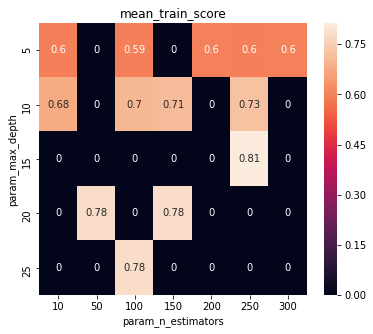

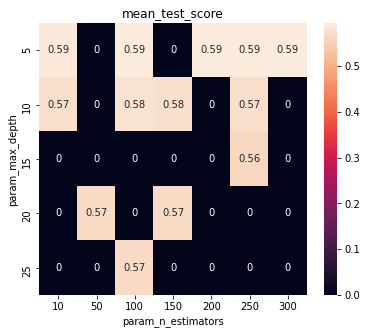

In [238]:
score_heatmap(cv_results_f3,'param_max_depth','param_n_estimators','mean_train_score')
score_heatmap(cv_results_f3,'param_max_depth','param_n_estimators','mean_test_score')

##### Best Model Fit and score

In [239]:
# Best model from complete data training (outliers removed)
Reg_Model_CV_3.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [241]:
rf_reg_f3_fd = RandomForestRegressor(n_estimators= 100,
                                     min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5)

In [242]:
rf_reg_f3_fd.fit(car_data_f3,car_data_y_train_enc)

RandomForestRegressor(max_depth=5, min_samples_leaf=5)

##### Train split Score

In [243]:
rf_f3_fd_r2train = rf_reg_f3_fd.score(car_data_f3,car_data_y_train_enc)
rf_f3_fd_r2train

0.593569745510834

##### RMSE Score

In [244]:
rf_f3_fd_rmse_train = mean_squared_error(car_data_y_train_enc, rf_reg_f3_fd.predict(car_data_f3),squared = False)
rf_f3_fd_rmse_train

8.01888397896948

##### Predictions Histogram plot

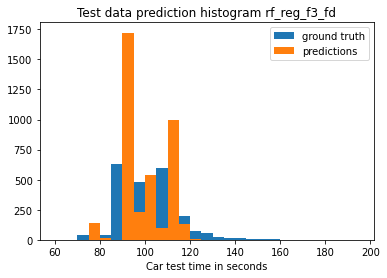

In [245]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(rf_reg_f3_fd.predict(car_data_f3), bins = range(60,200,5), label='predictions')
plt.title('Test data prediction histogram rf_reg_f3_fd')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

In [246]:
car_data_y_train_enc.shape,rf_reg_f3_fd.predict(car_data_f3).shape

((3881,), (3881,))

#### Kaggle score of Random forest model - rf_reg_f3

In [247]:
generate_test_data_csv('f3', rf_reg_f3_fd , car_data_test, 'test_data_predictions_olr_fd\RF_F3_fd2_predicts_olr.csv')

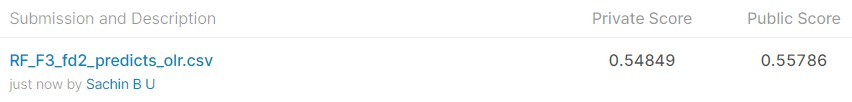

In [248]:
display.Image("test_data_predictions_olr_fd\RF_F3_fd2_predicts_olr.jpg")

## 2. ExtraTree with features F3_F4

### Combined features of car_data_f3 and car_data_f4

We will now check how combining features f3 and f4 impacts the scores.

car_data_f3 consists of Target encoded categorical Feature + Filtered Features + 2/3 wayfeature interaction

car_data_f4 consists of Dimensionality Reduction features (Target encoded + Feature filtered data)

In [157]:
car_data_f3_f4 = pd.concat([car_data_f3,car_data_f4],axis=1)
car_data_f3_f4

,X0,X1,X2,X3,X5,X6,X8,X189,X261,X127,...,ica_10,ica_11,ica_12,ica_13,ica_14,ica_15,ica_16,ica_17,ica_18,ica_19
1,99.491872,93.723226,95.754685,100.033190,100.669318,98.945502,97.746933,1,0,1,...,-0.017403,-0.006570,0.005096,-0.002850,-0.006283,-0.003516,-0.031169,-0.022803,0.005949,0.047834
4,78.025543,101.412574,83.369927,96.564507,100.669318,101.346464,102.194215,0,0,0,...,0.016781,0.001902,-0.009439,0.009583,0.090378,0.003797,-0.001091,0.004427,-0.017296,-0.001375
11,93.221343,100.095378,98.080370,96.564507,105.582108,103.134842,97.746933,1,0,1,...,0.014948,0.004904,0.021105,0.063159,0.000204,-0.013084,-0.015596,0.005374,0.005782,-0.005890
13,93.221343,100.095378,98.080370,96.564507,100.931360,103.134842,97.746933,1,0,1,...,0.018605,0.001272,0.019738,0.005594,0.000210,-0.013477,-0.015294,0.004620,-0.003246,-0.006150
14,94.618699,101.868462,103.732453,100.033190,100.931360,100.306286,100.486194,1,0,1,...,0.024668,0.006481,-0.002186,0.003329,-0.001175,-0.019578,-0.005331,-0.005977,0.015716,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,112.552235,101.868462,103.732453,101.959269,98.672500,101.346464,102.551197,1,1,0,...,0.040869,0.000513,-0.019626,-0.018677,-0.007229,0.012028,0.002211,-0.018836,-0.000555,0.003992
4205,112.072707,96.316707,109.617931,105.114414,98.672500,103.134842,103.446154,0,0,0,...,-0.006839,0.004177,-0.016376,-0.016061,-0.009386,-0.010349,-0.005457,-0.000856,-0.065809,0.031825
4206,112.552235,101.412574,108.393464,102.507477,98.672500,100.306286,104.976311,1,1,0,...,0.004199,0.000447,0.004123,-0.022524,-0.005281,-0.001311,0.002973,0.001156,-0.011087,0.000512
4207,93.221343,100.095378,98.080370,96.564507,98.672500,98.945502,101.156723,1,0,1,...,0.014685,0.003080,-0.000361,-0.016778,0.001423,-0.009781,-0.004662,0.006904,-0.030661,-0.002183


In [321]:
ext_reg_f3_f4 =  ExtraTreesRegressor(n_estimators= 100,
                                     min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5)

In [322]:
ext_reg_f3_f4.fit(car_data_f3_f4,car_data_y_train_enc)

ExtraTreesRegressor(max_depth=5, min_samples_leaf=5)

##### Train split Score

In [323]:
ext_reg_f3_f4_r2train = r2_score(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4))
ext_reg_f3_f4_r2train

0.5899857770346599

##### RMSE Score

In [324]:
ext_reg_f3_f4_rmse_train = mean_squared_error(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4),squared = False)
ext_reg_f3_f4_rmse_train

8.05416229259399

##### Predictions Histogram plot

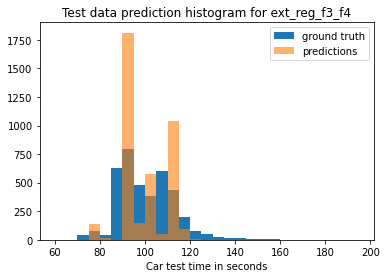

In [327]:
plt.hist(car_data_y_train_enc, bins = range(60,200,5), label='ground truth')
plt.hist(ext_reg_f3_f4.predict(car_data_f3_f4),bins = range(60,200,5), label='predictions', alpha=0.6)
plt.title('Test data prediction histogram for ext_reg_f3_f4')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score of Extratree model - ext_reg_f3_f4

In [188]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr.csv')

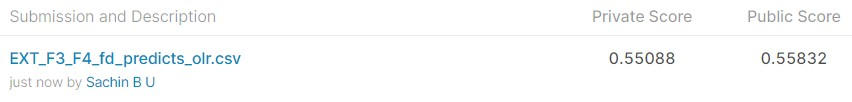

In [195]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr.jpg")

### Best model selection for full data EXT F3_F4

#### a. Same Paramters

In [217]:
ext_reg_f3_f4 = ExtraTreesRegressor(criterion='mse')

ext_params = {'n_estimators':[10,50,100,150,200,250,300],
              'max_depth':[5,10,15,20,25],
              'min_samples_split':[2,3,4,5,6],
              'min_samples_leaf':[1,2,3,4,5,],
              }

In [218]:
EXT_Reg_Model_CV_3_4 = RandomizedSearchCV(ext_reg_f3_f4, 
                                          ext_params,
                                          cv = 30,
                                          scoring='r2',
                                          n_iter = 15,
                                          n_jobs = -1, 
                                          verbose = 5, 
                                          random_state = 25,
                                          return_train_score=True)

##### Best Model Selection for car_data_f3_f4

In [219]:
EXT_Reg_Model_CV_3_4.fit(car_data_f3_f4,car_data_y_train_enc)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


RandomizedSearchCV(cv=30, estimator=ExtraTreesRegressor(), n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300]},
                   random_state=25, return_train_score=True, scoring='r2',
                   verbose=5)

In [220]:
EXT_cv_results_f3_f4 = pd.DataFrame.from_dict(EXT_Reg_Model_CV_3_4.cv_results_)

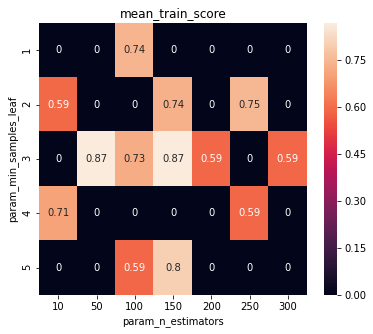

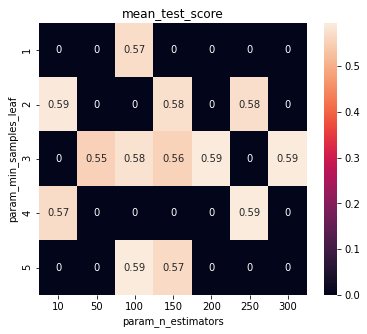

In [221]:
score_heatmap(EXT_cv_results_f3_f4,'param_min_samples_leaf','param_n_estimators','mean_train_score')
score_heatmap(EXT_cv_results_f3_f4,'param_min_samples_leaf','param_n_estimators','mean_test_score')

##### Best Model Fit and score

In [223]:
EXT_Reg_Model_CV_3_4.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

#### Same as initially selected model

#### b. max_samples Paramters

In [143]:
ext_reg_f3_f4 = ExtraTreesRegressor(n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 5,
                                    max_depth = 5)

ext_params = {'max_samples': [0.5,0.6,0.7,0.8,0.9,1.0]}

In [137]:
EXT_Reg_Model_CV_3_4 = RandomizedSearchCV(ext_reg_f3_f4, 
                                          ext_params,
                                          cv = 30,
                                          scoring='r2',
                                          n_iter = 15,
                                          n_jobs = -1, 
                                          verbose = 5, 
                                          random_state = 25,
                                          return_train_score=True)

##### Best Model Selection for car_data_f3_f4

In [140]:
EXT_Reg_Model_CV_3_4.fit(car_data_f3_f4,car_data_y_train_enc)

Fitting 30 folds for each of 6 candidates, totalling 180 fits


RandomizedSearchCV(cv=30,
                   estimator=ExtraTreesRegressor(max_depth=5,
                                                 min_samples_leaf=5),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                        1.0]},
                   random_state=25, return_train_score=True, scoring='r2',
                   verbose=5)

In [141]:
EXT_cv_results_f3_f4 = pd.DataFrame.from_dict(EXT_Reg_Model_CV_3_4.cv_results_)

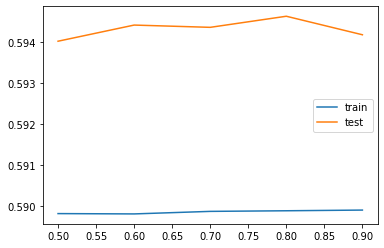

In [149]:
plt.plot(EXT_cv_results_f3_f4['param_max_samples'],EXT_cv_results_f3_f4['mean_train_score'],label='train')
plt.plot(EXT_cv_results_f3_f4['param_max_samples'],EXT_cv_results_f3_f4['mean_test_score'],label='test')
plt.legend()
plt.show()

##### Best Model Fit and score

In [150]:
EXT_Reg_Model_CV_3_4.best_params_

{'max_samples': 0.8}

In [144]:
ext_reg_f3_f4 =  ExtraTreesRegressor(n_estimators= 100,
                                     min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5,
                                     max_samples = 0.8)

In [145]:
ext_reg_f3_f4.fit(car_data_f3_f4,car_data_y_train_enc)

ExtraTreesRegressor(max_depth=5, max_samples=0.8, min_samples_leaf=5)

##### Train split Score

In [146]:
ext_reg_f3_f4_r2train = r2_score(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4))
ext_reg_f3_f4_r2train

0.5899054878550067

##### RMSE Score

In [147]:
ext_reg_f3_f4_rmse_train = mean_squared_error(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4),squared = False)
ext_reg_f3_f4_rmse_train

8.054950838933028

##### Predictions Histogram plot

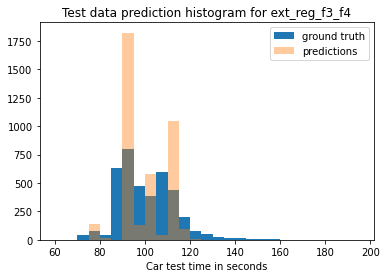

In [148]:
plt.hist(car_data_y_train_enc, bins = range(60,200,5), label='ground truth')
plt.hist(ext_reg_f3_f4.predict(car_data_f3_f4), bins = range(60,200,5), label='predictions',alpha=0.4)
plt.title('Test data prediction histogram for ext_reg_f3_f4')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score of Extratree model - ext_reg_f3_f4

In [149]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_0.8.csv')

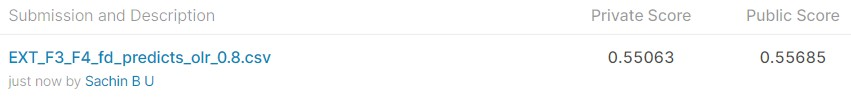

In [151]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_0.8.jpg")

#### c. min_impurity_decrease Paramters

In [158]:
ext_reg_f3_f4 = ExtraTreesRegressor(n_estimators = 100,
                                    min_samples_split = 2,
                                    min_samples_leaf = 5,
                                    max_depth = 5)

ext_params = {'min_impurity_decrease': [0.05,0.1,0.15,0.2]}

In [159]:
EXT_Reg_Model_CV_3_4 = RandomizedSearchCV(ext_reg_f3_f4, 
                                          ext_params,
                                          cv = 30,
                                          scoring='r2',
                                          n_iter = 15,
                                          n_jobs = -1, 
                                          verbose = 5, 
                                          random_state = 25,
                                          return_train_score=True)

##### Best Model Selection for car_data_f3_f4

In [160]:
EXT_Reg_Model_CV_3_4.fit(car_data_f3_f4,car_data_y_train_enc)

Fitting 30 folds for each of 4 candidates, totalling 120 fits


RandomizedSearchCV(cv=30,
                   estimator=ExtraTreesRegressor(max_depth=5,
                                                 min_samples_leaf=5),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'min_impurity_decrease': [0.05, 0.1,
                                                                  0.15, 0.2]},
                   random_state=25, return_train_score=True, scoring='r2',
                   verbose=5)

In [161]:
EXT_cv_results_f3_f4 = pd.DataFrame.from_dict(EXT_Reg_Model_CV_3_4.cv_results_)

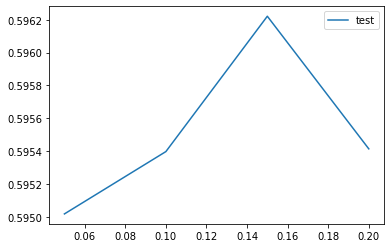

In [162]:
# plt.plot(EXT_cv_results_f3_f4['param_min_impurity_decrease'],EXT_cv_results_f3_f4['mean_train_score'],label='train')
plt.plot(EXT_cv_results_f3_f4['param_min_impurity_decrease'],EXT_cv_results_f3_f4['mean_test_score'],label='test')
plt.legend()
plt.show()

##### Best Model Fit and score

In [163]:
EXT_Reg_Model_CV_3_4.best_params_

{'min_impurity_decrease': 0.15}

In [185]:
ext_reg_f3_f4 =  ExtraTreesRegressor(n_estimators= 100,
                                     min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5,
                                     min_impurity_decrease = 0.21)

In [186]:
ext_reg_f3_f4.fit(car_data_f3_f4,car_data_y_train_enc)

ExtraTreesRegressor(max_depth=5, min_impurity_decrease=0.21, min_samples_leaf=5)

In [179]:
# ext_reg_f3_f4

In [193]:
joblib.dump(ext_reg_f3_f4,'Best_model_EXT_F3F4_i0.21.joblib')

['Best_model_EXT_F3F4_i0.21.joblib']

In [300]:
ext_reg_f3_f4 = joblib.load('Best_model_EXT_F3F4_i0.21.joblib')

##### Train split Score

In [192]:
ext_reg_f3_f4_r2train = r2_score(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4))
ext_reg_f3_f4_r2train

0.5745370299321642

##### RMSE Score

In [188]:
ext_reg_f3_f4_rmse_train = mean_squared_error(car_data_y_train_enc,ext_reg_f3_f4.predict(car_data_f3_f4),squared = False)
ext_reg_f3_f4_rmse_train

8.204493950024666

##### Predictions Histogram plot

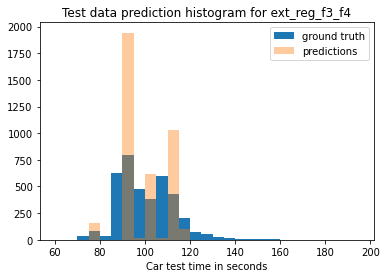

In [189]:
plt.hist(car_data_y_train_enc, bins = range(60,200,5), label='ground truth')
plt.hist(ext_reg_f3_f4.predict(car_data_f3_f4), bins = range(60,200,5), label='predictions',alpha=0.4)
plt.title('Test data prediction histogram for ext_reg_f3_f4')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score of Extratree model - ext_reg_f3_f4

In [233]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.15.csv')

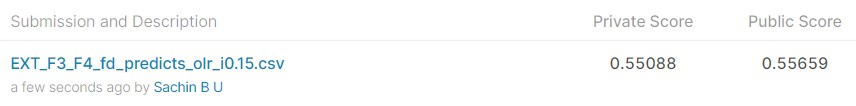

In [234]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.15.jpg")

In [265]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.2.csv')

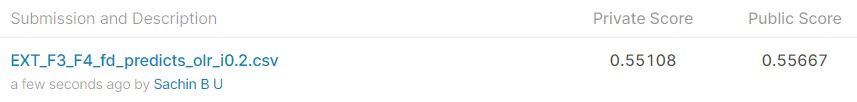

In [267]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.2.jpg")

In [253]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.25.csv')

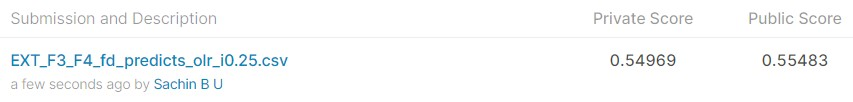

In [266]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.25.jpg")

In [277]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.22.csv')

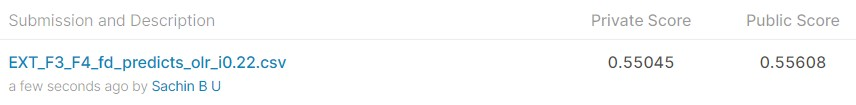

In [278]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.22.jpg")

### Best Score

In [191]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.21.csv')

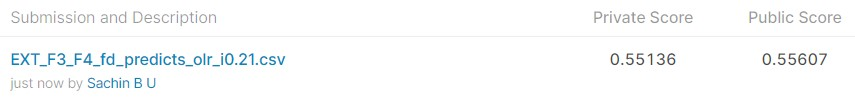

In [195]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.21.jpg")

In [296]:
generate_test_data_csv('f3_f4', ext_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.211.csv')

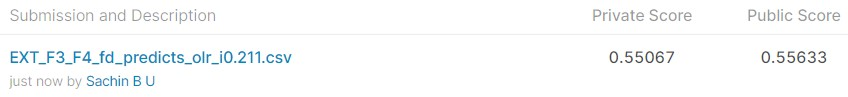

In [297]:
display.Image("test_data_predictions_olr_fd\EXT_F3_F4_fd_predicts_olr_i0.211.jpg")

## 3. Random Forest with features F2

### B. Training on Filtered + Target Encoded feature + 2/3 way interaction features data

In [190]:
rf_reg_f2 = RandomForestRegressor(n_estimators= 250,
                                  min_samples_split= 6,
                                  min_samples_leaf= 4,
                                  max_depth= 5)

In [191]:
rf_reg_f2.fit(car_data_f2,car_data_y_train_enc)

RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=6,
                      n_estimators=250)

##### Train split Score

In [193]:
rf_f2_r2train = rf_reg_f2.score(car_data_f2,car_data_y_train_enc)
rf_f2_r2train

0.5940825761671223

##### RMSE Score

In [194]:
rf_f2_rmse_train = mean_squared_error(car_data_y_train_enc, rf_reg_f2.predict(car_data_f2),squared = False)
rf_f2_rmse_train

8.013823298159028

##### Predictions Histogram plot

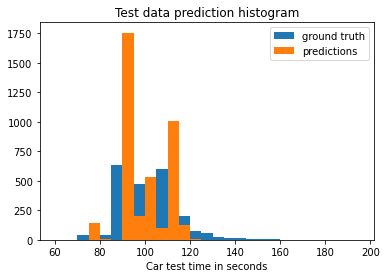

In [195]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(rf_reg_f2.predict(car_data_f2), bins = range(60,200,5), label='predictions')
plt.title('Test data prediction histogram')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

In [169]:
car_data_y_train_enc.shape,rf_reg_f3.predict(car_data_f3).shape

((3881,), (3881,))

#### Kaggle score of Random forest model - rf_reg_f2

In [196]:
generate_test_data_csv('f2', rf_reg_f2 , car_data_test, 'test_data_predictions_olr_fd\RF_F2_fd_predicts_olr.csv')

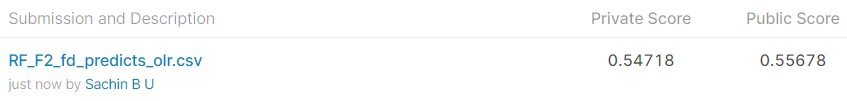

In [227]:
display.Image("test_data_predictions_olr_fd\RF_F2_fd_predicts_olr.jpg")

### Best Model Selection for full data for RF_F2

In [249]:
rf_reg_f2 = RandomForestRegressor(criterion='mse')

In [250]:
Reg_Model_CV_2 = RandomizedSearchCV(rf_reg_f2, 
                                    params,
                                    cv = 30,
                                    scoring='r2',
                                    n_iter = 15,
                                    n_jobs = -1, 
                                    verbose = 5, 
                                    random_state = 25,
                                    return_train_score=True)

##### Best Model Selection for car_data_f2

In [251]:
Reg_Model_CV_2.fit(car_data_f2,car_data_y_train_enc)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


RandomizedSearchCV(cv=30, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 50, 100, 150, 200,
                                                         250, 300]},
                   random_state=25, return_train_score=True, scoring='r2',
                   verbose=5)

In [252]:
cv_results_f2 = pd.DataFrame.from_dict(Reg_Model_CV_2.cv_results_)
cv_results_f2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,...,split22_train_score,split23_train_score,split24_train_score,split25_train_score,split26_train_score,split27_train_score,split28_train_score,split29_train_score,mean_train_score,std_train_score
0,2.477307,0.239306,0.012779,0.005359,50,6,3,20,"{'n_estimators': 50, 'min_samples_split': 6, '...",0.662322,...,0.782522,0.779924,0.779329,0.780984,0.781719,0.780524,0.779634,0.779208,0.782094,0.004903
1,0.473254,0.083521,0.009774,0.006468,10,5,4,10,"{'n_estimators': 10, 'min_samples_split': 5, '...",0.684655,...,0.684667,0.677951,0.678323,0.675042,0.682405,0.675669,0.678441,0.680966,0.678893,0.005995
2,0.239571,0.035050,0.007849,0.005503,10,4,2,5,"{'n_estimators': 10, 'min_samples_split': 4, '...",0.707704,...,0.596644,0.600572,0.592546,0.588987,0.592571,0.587690,0.585834,0.590648,0.594638,0.007222
3,7.148196,0.786972,0.029366,0.008966,150,5,5,20,"{'n_estimators': 150, 'min_samples_split': 5, ...",0.687578,...,0.731003,0.721580,0.725118,0.724457,0.727113,0.723256,0.723992,0.725060,0.727379,0.005264
4,13.349318,1.377438,0.046457,0.012545,250,3,2,15,"{'n_estimators': 250, 'min_samples_split': 3, ...",0.673660,...,0.817009,0.807881,0.810601,0.807236,0.811140,0.810109,0.809290,0.809865,0.812591,0.004056
5,7.589760,0.658736,0.027077,0.007999,150,2,3,20,"{'n_estimators': 150, 'min_samples_split': 2, ...",0.678246,...,0.788092,0.780670,0.781794,0.779467,0.782313,0.781587,0.783144,0.782411,0.784132,0.004304
6,9.356627,0.661025,0.041136,0.010270,250,2,2,10,"{'n_estimators': 250, 'min_samples_split': 2, ...",0.701636,...,0.726252,0.718697,0.720732,0.716285,0.722138,0.720715,0.721836,0.721739,0.724519,0.004146
7,5.111672,0.385082,0.019823,0.007078,100,2,3,25,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.666306,...,0.785684,0.780288,0.782297,0.779022,0.786112,0.780491,0.781603,0.782807,0.783963,0.004491
8,4.101576,0.319796,0.030517,0.007160,200,2,3,5,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.710512,...,0.599304,0.593084,0.592617,0.593233,0.597346,0.591500,0.592467,0.596494,0.597603,0.006328
9,6.135141,0.481467,0.043097,0.010405,300,5,3,5,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.710417,...,0.598563,0.591983,0.595295,0.593493,0.595723,0.591096,0.592582,0.595669,0.597303,0.006442


##### Heatmap plot of parameters vs score

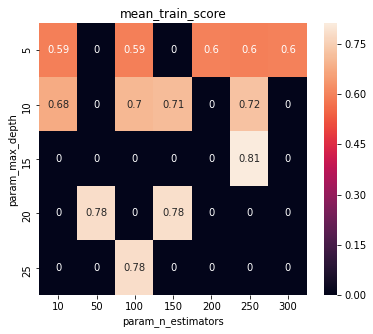

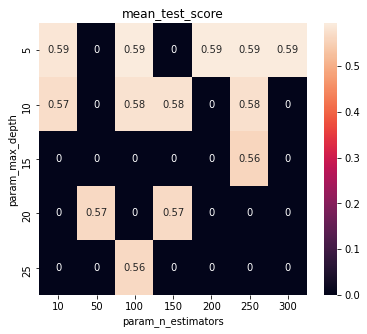

In [255]:
score_heatmap(cv_results_f2,'param_max_depth','param_n_estimators','mean_train_score')
score_heatmap(cv_results_f2,'param_max_depth','param_n_estimators','mean_test_score')

##### Best Model Fit and score

In [256]:
Reg_Model_CV_2.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 5}

In [257]:
rf_reg_f2_fd = RandomForestRegressor(n_estimators= 100,
                                     min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5)

In [258]:
rf_reg_f2_fd.fit(car_data_f2,car_data_y_train_enc)

RandomForestRegressor(max_depth=5, min_samples_leaf=5)

##### Train split Score

In [259]:
rf_f2_fd_r2train = rf_reg_f2_fd.score(car_data_f2,car_data_y_train_enc)
rf_f2_fd_r2train

0.5936208712911715

##### RMSE Score

In [260]:
rf_f2_fd_rmse_train = mean_squared_error(car_data_y_train_enc, rf_reg_f2_fd.predict(car_data_f2),squared = False)
rf_f2_fd_rmse_train

8.018379606337325

##### Predictions Histogram plot

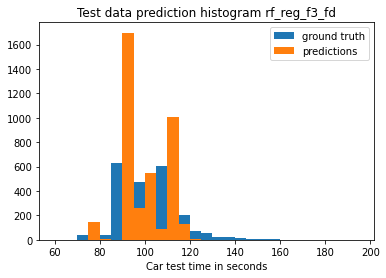

In [261]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(rf_reg_f2_fd.predict(car_data_f2), bins = range(60,200,5), label='predictions')
plt.title('Test data prediction histogram rf_reg_f3_fd')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

In [262]:
car_data_y_train_enc.shape,rf_reg_f2_fd.predict(car_data_f2).shape

((3881,), (3881,))

#### Kaggle score of Random forest model - rf_reg_f2

In [263]:
generate_test_data_csv('f2', rf_reg_f2_fd , car_data_test, 'test_data_predictions_olr_fd\RF_F2_fd2_predicts_olr.csv')

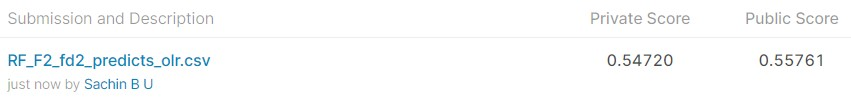

In [264]:
display.Image("test_data_predictions_olr_fd\RF_F2_fd2_predicts_olr.jpg")

##### Private Score is less than 0.55

## 4. Stacked Model 

### A. 100 DecisionTrees + 1 Ridgeregression on feature combination F3_F4

In [152]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Reference
# ext_reg_f3_f4 =  ExtraTreesRegressor(n_estimators= 100,
#                                      min_samples_split= 2,
#                                      min_samples_leaf= 5,
#                                      max_depth= 5,
#                                      max_samples = 0.8)

##### Base and Meta model definition

In [161]:
# Base models 
# Best models of feature set 1 is selected as base model

# Random Forest, GBoost and ExtraTree regressor models
dt_reg_f3_f4_list =[]

for i in range(100):
    dt_reg_f3_f4_list.append(DecisionTreeRegressor(min_samples_split= 2,
                                                min_samples_leaf= 5,
                                                max_depth= 5))

# Meta model
Rdg_reg_f3_f4 = Ridge(alpha = 0.01)

In [167]:
stack5_reg_f3f4_fd = StackingCVRegressor(regressors = (dt_reg_f3_f4_list),
                                    meta_regressor = Rdg_reg_f3_f4,
                                    shuffle=True)

In [175]:
stack5_reg_f3f4_fd.fit(car_data_f3_f4,car_data_y_train_enc)

StackingCVRegressor(meta_regressor=Ridge(alpha=0.01),
                    regressors=[DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeReg...
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTre

In [177]:
stack5_f3_fd_r2train = r2_score(car_data_y_train_enc, stack5_reg_f3f4_fd.predict(car_data_f3_f4))
stack5_f3_fd_r2train

0.6000517568586594

In [178]:
stack5_f3_fd_rmse_train = mean_squared_error(car_data_y_train_enc, stack5_reg_f3f4_fd.predict(car_data_f3_f4),squared = False)
stack5_f3_fd_rmse_train

7.954681803668737

##### Predictions Histogram plot

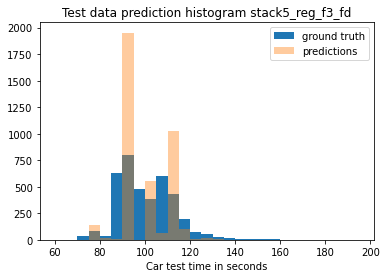

In [179]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(stack5_reg_f3f4_fd.predict(car_data_f3_f4), bins = range(60,200,5), label='predictions', alpha = 0.4)
plt.title('Test data prediction histogram stack5_reg_f3_fd')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score of Random forest model - rf_reg_f2

In [180]:
generate_test_data_csv('f3_f4', stack5_reg_f3f4_fd , car_data_test, 'test_data_predictions_olr_fd\STK5_F3F4_fd_predicts_olr.csv')

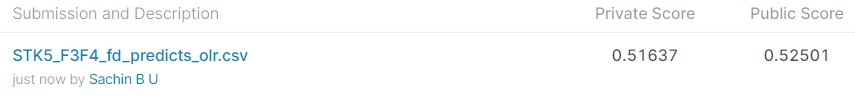

In [181]:
display.Image("test_data_predictions_olr_fd\STK5_F3F4_fd_predicts_olr.jpg")

### B. 100 DecisionTrees + 1 Ridge regression on F3

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
# Reference
# ext_reg_f3_f4 =  ExtraTreesRegressor(n_estimators= 100,
#                                      min_samples_split= 2,
#                                      min_samples_leaf= 5,
#                                      max_depth= 5,
#                                      max_samples = 0.8)

##### Base and Meta model definition

In [184]:
# Base models 
# Best models of feature set 3 is selected as base model

# Random Forest, GBoost and ExtraTree regressor models
dt_reg_f3_list =[]

for i in range(100):
    dt_reg_f3_list.append(DecisionTreeRegressor(min_samples_split= 2,
                                                min_samples_leaf= 5,
                                                max_depth= 5))

# Meta model
Rdg_reg_f3 = Ridge(alpha = 0.01)

In [185]:
stack5_reg_f3_fd = StackingCVRegressor(regressors = (dt_reg_f3_list),
                                    meta_regressor = Rdg_reg_f3,
                                    shuffle=True)

In [186]:
stack5_reg_f3_fd.fit(car_data_f3,car_data_y_train_enc)

StackingCVRegressor(meta_regressor=Ridge(alpha=0.01),
                    regressors=[DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTreeReg...
                                DecisionTreeRegressor(max_depth=5,
                                                      min_samples_leaf=5),
                                DecisionTre

Train r2 Score

In [187]:
stack5_f3_fd_r2train = r2_score(car_data_y_train_enc, stack5_reg_f3_fd.predict(car_data_f3))
stack5_f3_fd_r2train

0.5835502075938297

Train RMSE score

In [188]:
stack5_f3_fd_rmse_train = mean_squared_error(car_data_y_train_enc, stack5_reg_f3_fd.predict(car_data_f3),squared = False)
stack5_f3_fd_rmse_train

8.117125119045063

##### Predictions Histogram plot

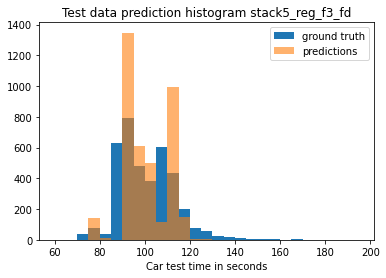

In [190]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(stack5_reg_f3_fd.predict(car_data_f3), bins = range(60,200,5), label='predictions', alpha = 0.6)
plt.title('Test data prediction histogram stack5_reg_f3_fd')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score of Random forest model - rf_reg_f2

In [191]:
generate_test_data_csv('f3', stack5_reg_f3_fd , car_data_test, 'test_data_predictions_olr_fd\STK5_F3_fd_predicts_olr.csv')

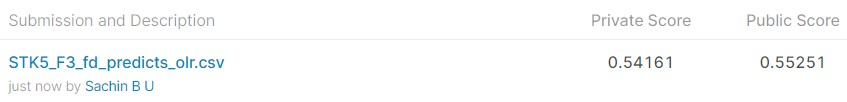

In [192]:
display.Image("test_data_predictions_olr_fd\STK5_F3_fd_predicts_olr.jpg")

## 5. Custom Stacking

### A. Custom stack of 100 DecisionTrees and Ridge Regression 
### (Train data split to D1 and D2 (50-50) for Base and Meta model training)

In [193]:
class custom_stack_model():
    '''This is custom stack model. Here the training data is spilt into two datasets D1 and D2 of equal size.
    Base models are trained on 'k' samples of D1 dataset. There will be 'k' base models.
    This implies there will be k predictions for each row of data.
    Meta model is trained on 'k' Base model predictions of D2 dataset. 
    training data for meta model will be of shape (len(D2),k)
    
    num_samples                 : number of samples on which base models are trained
    sample_percentage : percentage of D1 dataset to be considered for each sample set 
    
    If base models have sub models, average value of sub model predictions is considered as y'''
    
    def __init__(self,base_models,meta_model,num_samples=5,sample_percentage=0.6):
    
        self.base_models = base_models
        self.meta_model = meta_model
        self.n = num_samples
        self.sample_percentage  = sample_percentage
    
    def fit(self,X,y):
        
        # Splitting data in to sets D1 and D2
        X_D1, X_D2, y_D1, y_D2 = train_test_split(X, 
                                                  y, 
                                                  test_size=0.5, 
                                                  random_state=42)
        
        X_D1_sample = []
        y_D1_sample = []
        
        # Sampling of D1 data
        for i in range(self.n):
            X_D1_sample.append(X_D1.sample(int(self.sample_percentage*X_D1.shape[0]), replace = False))
            y_D1_sample.append(y_D1.loc[X_D1_sample[i].index])
            
#         print(self.n,' samples generated')
        
#         print('Base models training for',self.n,'samples')
        
        # List to save trained Base models
        self.n_models = []
        
        # Dataframe to save predictions of base models
        y_pred_df = pd.DataFrame()
        
        for i in range(self.n):
            base_model_trained=[]
            y_sum=np.zeros((X_D2.shape[0]))
            
            for model in self.base_models:
                model.fit(X_D1_sample[i],y_D1_sample[i])
                base_model_trained.append(model)
                
                # Base model prediction for D2 data set
                y = model.predict(X_D2)
                y_sum = np.add(y_sum,y)
            
            self.n_models.append(base_model_trained)
            y_pred_df['y'+str(i)] = y_sum/len(self.base_models)
        
        y_pred_df.index = X_D2.index
        self.meta_model.fit(y_pred_df,y_D2)
#         print('Meta model training done')
        
    def predict(self,X):
        
        # Base model predictions
        y_pred_df = pd.DataFrame()
        for i in range(self.n):
            y_sum=np.zeros((X.shape[0]))
            for j in range(len(self.base_models)):
                    y = self.n_models[i][j].predict(X)
                    y_sum = np.add(y_sum,y)
            y_pred_df['y'+str(i)] = y_sum/len(self.base_models)
        
        y_pred_df.index = X.index
        
        # Meta Model prediction
        y = self.meta_model.predict(y_pred_df)
        
        return y

In [194]:
def cstack_GridSearch_CV(X,y,models,params,K_folds,pr=0.5):
    '''This function implements grid search for 'number of samples' parameter of custom stack model.
    K_fold cross validation is done and returns dataframe of number of samples,train and validation scores'''
    base_model_set = models['base_models']
    meta_model = models['meta_model']
    param_n = params['num_samples']
    
    df_results = pd.DataFrame
        
    trainscores = []
    cvscores  = []
    
    for n in tqdm(param_n):
        for k in range(K_folds):
            trainscores_folds = []
            cvscores_folds  = []
            
            #variable to split data into number of folds
            size = int(len(X)/K_folds)
        
            #one slice of the train data is considered as cv_indicies. Indices is shifted at each fold
            cv_indices= list(range(size*k, size*k+size))
            
            #remaining indices apart from cv_indices are considered for training_indices
            train_indices = list(set(list(range(0, len(X)))) - set(cv_indices))
            
            # selecting the data points based on the train_indices and cv_indices
            X_train = X.iloc[train_indices]
            Y_train = y.iloc[train_indices]
            X_cv  = X.iloc[cv_indices]
            Y_cv  = y.iloc[cv_indices]
            
            cstack_reg = custom_stack_model(base_models = base_model_set,
                                            meta_model = meta_model,
                                            num_samples = n, 
                                            sample_percentage = pr)
            
            cstack_reg.fit(X_train,Y_train)
            
            Y_predicted = cstack_reg.predict(X_train)
            trainscores_folds.append(r2_score(Y_train, Y_predicted))

            Y_predicted = cstack_reg.predict(X_cv)
            cvscores_folds.append(r2_score(Y_cv, Y_predicted))
            
        trainscores.append(np.mean(np.array(trainscores_folds)))
        cvscores.append(np.mean(np.array(cvscores_folds)))
        
    results_df = pd.DataFrame({'num_samples': param_n,
                               'train_score':trainscores,
                               'cv_score':cvscores})

    return results_df

In [299]:
# Base models 
# Best models of feature set 3 and 4 is selected as base model

dt_reg_f3_f4 = DecisionTreeRegressor(min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5)
# Meta model
Rdg_reg_f3_f4 = Ridge(alpha = 0.01)

In [300]:
cstack7_fd_reg_f3_f4 = custom_stack_model(base_models = (dt_reg_f3_f4,),
                                          meta_model = Rdg_reg_f3_f4,
                                          num_samples = 100, 
                                          sample_percentage=0.7)

In [301]:
cstack7_fd_reg_f3_f4.fit(car_data_f3_f4,car_data_y_train_enc)

Train r2 Score

In [302]:
cstack7_fd_f3f4_r2train = r2_score(car_data_y_train_enc, cstack7_fd_reg_f3_f4.predict(car_data_f3_f4))
cstack7_fd_f3f4_r2train

0.5530223678930468

RMSE value

In [303]:
cstack7_fd_f3f4_rmse_train = mean_squared_error(car_data_y_train_enc, cstack7_fd_reg_f3_f4.predict(car_data_f3_f4),squared = False)
cstack7_fd_f3f4_rmse_train

8.409376765037555

##### Predictions Histogram plot

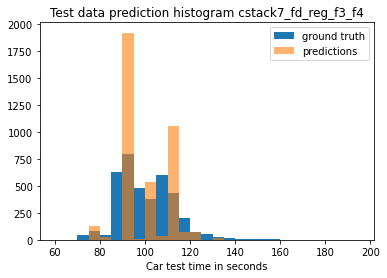

In [304]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(cstack7_fd_reg_f3_f4.predict(car_data_f3_f4), bins = range(60,200,5), label='predictions', alpha = 0.6)
plt.title('Test data prediction histogram cstack7_fd_reg_f3_f4')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score 

In [305]:
generate_test_data_csv('f3_f4', cstack7_fd_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\CSTK7_F3F4_fd_predicts_olr.csv')

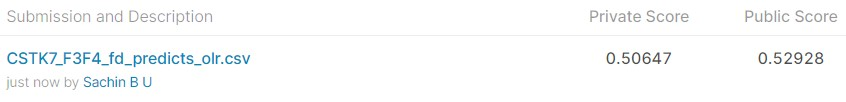

In [306]:
display.Image("test_data_predictions_olr_fd\CSTK7_F3F4_fd_predicts_olr.jpg")

### B. Custom stack of 100 DecisionTrees as Base models and Ridge Reg as Meta model
### (Train data split to D1 and D2 (60-40) for Base and Meta model training)

In [221]:
class custom_stack_model2():
    '''This is custom stack model. Here the training data is spilt into two datasets D1 and D2 of equal size.
    Base models are trained on 'k' samples of D1 dataset. There will be 'k' base models.
    This implies there will be k predictions for each row of data.
    Meta model is trained on 'k' Base model predictions of D2 dataset. 
    training data for meta model will be of shape (len(D2),k)
    
    num_samples                 : number of samples on which base models are trained
    sample_percentage : percentage of D1 dataset to be considered for each sample set 
    
    If base models have sub models, average value of sub model predictions is considered as y'''
    
    def __init__(self,base_models,meta_model,num_samples=5,sample_percentage=0.6):
    
        self.base_models = base_models
        self.meta_model = meta_model
        self.n = num_samples
        self.sample_percentage  = sample_percentage
    
    def fit(self,X,y):
        
        # Splitting data in to sets D1 and D2
        X_D1, X_D2, y_D1, y_D2 = train_test_split(X, 
                                                  y, 
                                                  test_size=0.6, 
                                                  random_state=42)
        
        X_D1_sample = []
        y_D1_sample = []
        
        # Sampling of D1 data
        for i in range(self.n):
            X_D1_sample.append(X_D1.sample(int(self.sample_percentage*X_D1.shape[0]), replace = False))
            y_D1_sample.append(y_D1.loc[X_D1_sample[i].index])
            
#         print(self.n,' samples generated')
        
#         print('Base models training for',self.n,'samples')
        
        # List to save trained Base models
        self.n_models = []
        
        # Dataframe to save predictions of base models
        y_pred_df = pd.DataFrame()
        
        for i in range(self.n):
            base_model_trained=[]
            y_sum=np.zeros((X_D2.shape[0]))
            
            for model in self.base_models:
                model.fit(X_D1_sample[i],y_D1_sample[i])
                base_model_trained.append(model)
                
                # Base model prediction for D2 data set
                y = model.predict(X_D2)
                y_sum = np.add(y_sum,y)
            
            self.n_models.append(base_model_trained)
            y_pred_df['y'+str(i)] = y_sum/len(self.base_models)
        
        y_pred_df.index = X_D2.index
        self.meta_model.fit(y_pred_df,y_D2)
#         print('Meta model training done')
        
    def predict(self,X):
        
        # Base model predictions
        y_pred_df = pd.DataFrame()
        for i in range(self.n):
            y_sum=np.zeros((X.shape[0]))
            for j in range(len(self.base_models)):
                    y = self.n_models[i][j].predict(X)
                    y_sum = np.add(y_sum,y)
            y_pred_df['y'+str(i)] = y_sum/len(self.base_models)
        
        y_pred_df.index = X.index
        
        # Meta Model prediction
        y = self.meta_model.predict(y_pred_df)
        
        return y

In [270]:
# Base models 
# Best models of feature set 3 and 4 is selected as base model

dt_reg_f3_f4 = DecisionTreeRegressor(min_samples_split= 2,
                                     min_samples_leaf= 5,
                                     max_depth= 5)
# Meta model
Rdg_reg_f3_f4 = Ridge(alpha = 0.01)

In [289]:
cstack8_fd_reg_f3_f4 = custom_stack_model2(base_models = (dt_reg_f3_f4,),
                                           meta_model = Rdg_reg_f3_f4,
                                           num_samples = 150, 
                                           sample_percentage=0.9)

In [290]:
cstack8_fd_reg_f3_f4.fit(car_data_f3_f4,car_data_y_train_enc)

Train r2 Score

In [291]:
cstack8_fd_f3f4_r2train = r2_score(car_data_y_train_enc, cstack8_fd_reg_f3_f4.predict(car_data_f3_f4))
cstack8_fd_f3f4_r2train

0.5547328608519513

Train RMSE value

In [292]:
cstack8_fd_f3f4_rmse_train = mean_squared_error(car_data_y_train_enc, cstack8_fd_reg_f3_f4.predict(car_data_f3_f4),squared = False)
cstack8_fd_f3f4_rmse_train

8.393270850063757

##### Predictions Histogram plot

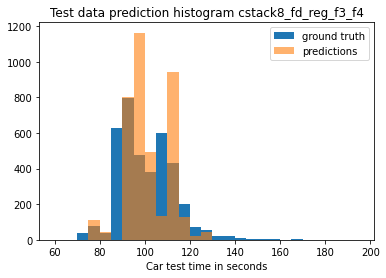

In [293]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(cstack8_fd_reg_f3_f4.predict(car_data_f3_f4), bins = range(60,200,5), label='predictions', alpha = 0.6)
plt.title('Test data prediction histogram cstack8_fd_reg_f3_f4')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score

In [294]:
generate_test_data_csv('f3_f4', cstack7_fd_reg_f3_f4 , car_data_test, 'test_data_predictions_olr_fd\CSTK8_F3F4_fd_predicts_olr.csv')

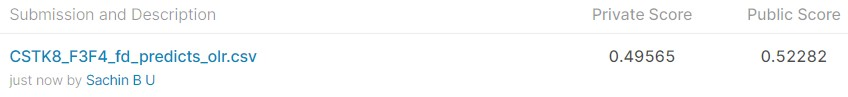

In [295]:
display.Image("test_data_predictions_olr_fd\CSTK8_F3F4_fd_predicts_olr.jpg")

### C. Custom stack of models similar to stack_f3
### (Train data split to D1 and D2 (50-50) for Base and Meta model training)

In [307]:
# Base models 
# Best models of feature set 3 is selected as base model

# Random Forest, XGBoost and ExtraTree regressor models
rf_reg_f3 = RandomForestRegressor(n_estimators= 250,
                                  min_samples_split= 6,
                                  min_samples_leaf= 4,
                                  max_depth= 5)
# Gradient Boost
gb_reg_f3 = lgbm.LGBMRegressor(num_leaves = 5,
                               n_estimators = 250, 
                               max_depth = 5, 
                               learning_rate = 0.1)

#ExtraTree
ext_reg_f3 = ExtraTreesRegressor(n_estimators= 100,
                                  min_samples_split= 2,
                                  min_samples_leaf= 5,
                                  max_depth= 5)

# Meta model
Rdg_reg_f3 = Ridge(alpha = 0.01)

cstack9_models_f3 = {'base_models':(rf_reg_f3,gb_reg_f3,ext_reg_f3),
                    'meta_model':Rdg_reg_f3}
cstack_params = {'num_samples':[5,8,10,12,15]}

In [308]:
CSTK9_cv_results_f3 = cstack_GridSearch_CV(car_data_f3,
                                           car_data_y_train_enc,
                                           cstack9_models_f3,
                                           cstack_params,
                                           K_folds=5,
                                           pr=0.7)

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [14:50<00:00, 178.08s/it]


##### Best Model Fit and score

In [310]:
CSTK9_cv_results_f3

,num_samples,train_score,cv_score
0,5,0.575403,0.617458
1,8,0.571366,0.646394
2,10,0.578182,0.650455
3,12,0.579040,0.659728
4,15,0.578839,0.636036


In [311]:
CSTK9_cv_results_f3[CSTK9_cv_results_f3['cv_score']==max(CSTK9_cv_results_f3['cv_score'])]

,num_samples,train_score,cv_score
3,12,0.57904,0.659728


In [312]:
cstack9_fd_reg_f3 = custom_stack_model(base_models = (rf_reg_f3,gb_reg_f3,ext_reg_f3),
                                       meta_model = Rdg_reg_f3,
                                       num_samples = 12, 
                                       sample_percentage=0.7)

In [313]:
cstack9_fd_reg_f3.fit(car_data_f3,car_data_y_train_enc)

Train r2 Score

In [316]:
cstack9_fd_f3_r2train = r2_score(car_data_y_train_enc, cstack9_fd_reg_f3.predict(car_data_f3))
cstack9_fd_f3_r2train

0.5949079778448418

Train RMSE value

In [317]:
cstack9_fd_f3_rmse_train = mean_squared_error(car_data_y_train_enc, cstack9_fd_reg_f3.predict(car_data_f3),squared = False)
cstack9_fd_f3_rmse_train

8.00567140714507

##### Predictions Histogram plot

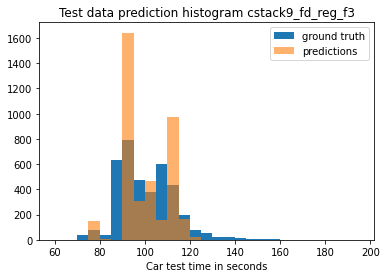

In [318]:
plt.hist(car_data_y_train_enc,bins = range(60,200,5), label='ground truth')
plt.hist(cstack9_fd_reg_f3.predict(car_data_f3), bins = range(60,200,5), label='predictions', alpha = 0.6)
plt.title('Test data prediction histogram cstack9_fd_reg_f3')
plt.xlabel('Car test time in seconds')
plt.legend()
plt.show()

#### Kaggle score 

In [319]:
generate_test_data_csv('f3', cstack9_fd_reg_f3 , car_data_test, 'test_data_predictions_olr_fd\CSTK9_F3_fd_predicts_olr.csv')

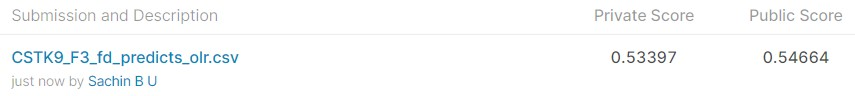

In [320]:
display.Image("test_data_predictions_olr_fd\CSTK9_F3_fd_predicts_olr.jpg")

## Summary

Scores are summarized in table below

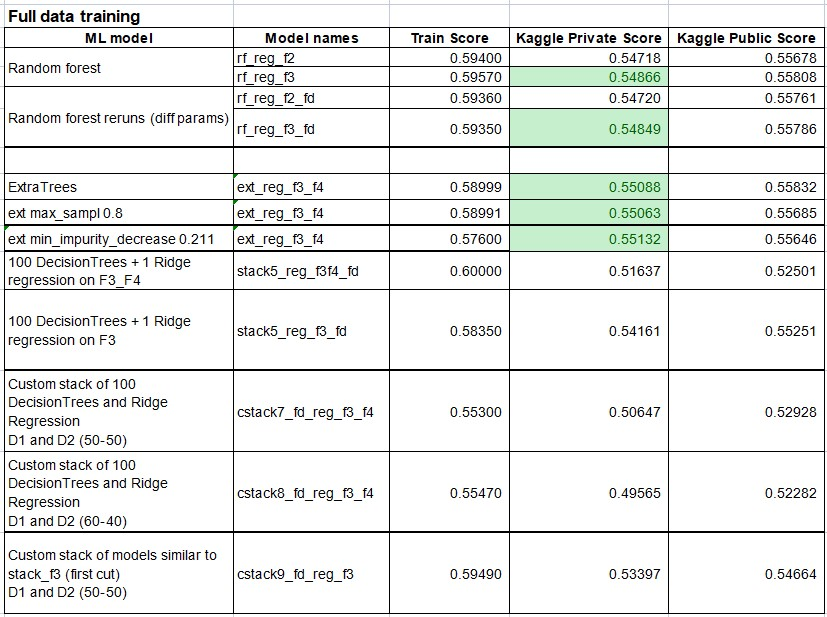

In [304]:
display.Image(".\ML_Model_Summary_4_fd_olr.jpg")

### Observations:

Extra Tree model with feature set F3 and F4 got kaggle private score of 0.55132